<a href="https://colab.research.google.com/github/zakaria-aabbou/App_sup_project/blob/main/Final_relational_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1 style="text-align:center;font-size: 3em"> Projet « Apprentissage supervisé » </h1>



---
Master2 MLSD

Année académique 2021/2022

Enseignant : Lazhar Labiod

Adresse : LIPADE – Université de Paris

Mail : lazhar.labiod@u-paris.fr

---


## Objectif

L’objectif de ce travail est la mise en pratique concrète d’un certain nombre de techniques
d’apprentissage supervisé (Bayesien Naïf, KNN, LDA, QDA, Linear SVM, Non Linear SVM,
Régression logistique, CART et Random Forest), à travers l’étude de données réelles
nécessitant l’utilisation de logiciels de traitement statistique de données R ou Python. Les
applications visées concernent deux types de données réelles.

# 1. Données Crédits bancaires :

L'ensemble de données de crédits décrit les détails financiers et bancaires des
clients et la tâche consiste à déterminer si le client est bon ou mauvais. L'hypothèse
est que la tâche consiste à prédire si un client remboursera un prêt ou un crédit.
L'ensemble de données comprend 1000 exemples et 20 variables, dont 7
numériques (entiers) et 13 catégorielles



*   Noms des variables :

(Statut du compte courant existant, Durée en mois, Historique de crédit, Objectif,
Montant du crédit, Compte d'épargne, Emploi actuel depuis, Taux de versement en,
pourcentage du revenu disponible, Statut personnel et sexe, Autres
débiteurs,Résidence actuelle depuis, Propriété, Age en années, Autres plans de
versement, Logement, Nombre de crédits existants dans cette banque, Travail,
Nombre de personnes à charge, Téléphone, Travailleur étranger).

Source des données Crédits :

https://raw.githubusercontent.com/jbrownlee/Datasets/master/german.csv



# 2. Données relationnelles :

Les données relationnelles représentent deux types d’information, une matrice des
valeurs objets/caractéristiques et un graphe des liens entre objets, qui fournissent
des informations utiles sous différents angles, mais ils ne sont pas toujours
cohérents et doivent donc être soigneusement alignés pour obtenir les meilleurs
résultats de classification. L’objectif de cette partie du projet est d'aborder ce
problème, afin de mettre en lumières les différents challenges posés par ce type de
données aux méthodes de classification.

Je vous encourage à faire preuve d’originalité : vous pouvez très bien utiliser des méthodes
qui n’ont pas été présentés en cours, telles que Gradient Boosting, Xgboost, XtremTree,
Adaboost

## Chargement & étude exploratoire préliminaire des données

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import scipy.io
citeseer = scipy.io.loadmat('/content/drive/MyDrive/partagé/Data/Donnees_relationnelles/citeseer.mat')
cora = scipy.io.loadmat('/content/drive/MyDrive/partagé/Data/Donnees_relationnelles/cora.mat')
pubmed = scipy.io.loadmat('/content/drive/MyDrive/partagé/Data/Donnees_relationnelles/pubmed.mat')

In [ ]:
for key, value in citeseer.items() :
   print (key)

__header__
__version__
__globals__
W
fea
gnd


In [ ]:
print("citeseer['W'] : ")
print(citeseer['W'])
print("cora['W'] : ")
print(cora['W'])
print("pubmed['W'] : ")
print(pubmed['W'])



**NB: On peut utiliser les Graph neural networks**


Description des bases matlab : 

- **fea** : la matrice *X(n,d)* où *n* est le nombre d’individus, *d* est
le nombre de variable 

- **W**: la matrice d’adjacence (des liens entre les individus) *W(n,n)*
- **gnd** : vecteur des labels (classes).


L’objectif de cette partie du projet est de mener une étude comparative des différentes
méthodes de classification sur des données relationnelles en utilisant

1. Uniquement l’information contenue dans la matrice X

2. Une Combinaison des informations W et X ; 
ℳ = 𝐃^(-1) . 𝐖 . 𝐗 
où D est une matrice
diagonale, chaque valeur diagonale correspond à la somme des valeurs d’une ligne
de W.

3. Discuter d’autres idées pour combiner et aligner les deux types d’information.

## Importation des Biblios nécessaires

In [ ]:
# Load libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import pandas as pd
import numpy as np
import torch
from pandas import read_csv
from pandas import set_option
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import inv
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
# !pip install catboost
import lightgbm as lgb
# from catboost import CatBoostClassifier

## Fonctions

In [ ]:
# scoring = 'accuracy'
# scoring = 'normalized_mutual_info_score'
# scoring = 'f1_weighted'

# f1’ metrics.f1_score for binary targets
# ‘f1_micro’ metrics.f1_score micro-averaged
# ‘f1_macro’ metrics.f1_score macro-averaged
# ‘f1_weighted’ metrics.f1_score weighted average
# ‘f1_samples’ metrics.f1_score by multilabel sample

# Test options and evaluation metric
num_folds = 5 # 10
seed = None
scoring_accuracy = 'accuracy'
scoring_nmi = 'normalized_mutual_info_score'
scoring_f1 = 'f1_weighted'

In [ ]:
def Spot_Check_Algorithms(X_train , Y_train):

    # Spot Check Algorithms
    models = []
    models.append(('LR', LogisticRegression(max_iter=200)))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    # models.append(('QDA', QDA()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))

    results_accuracy = []
    results_nmi = []
    results_f1 = []

    mean_accuracy = []
    mean_nmi = []
    mean_f1 = []

    names_Spot_Check_Algorithms = []

    for name, model in models:
        kfold = KFold(n_splits=num_folds, random_state=seed)

        # Accuracy
        cv_results_accuracy = cross_val_score(model, X_train, Y_train.ravel(), cv=kfold, scoring=scoring_accuracy)
        results_accuracy.append(cv_results_accuracy)
        msg = "%s: %f (%f)" % (name, cv_results_accuracy.mean(), cv_results_accuracy.std())
        print("Accuracy : " , msg)
        mean_accuracy.append(cv_results_accuracy.mean())

        # nmi
        cv_results_nmi = cross_val_score(model, X_train, Y_train.ravel(), cv=kfold, scoring=scoring_nmi)
        results_nmi.append(cv_results_nmi)
        msg = "%s: %f (%f)" % (name, cv_results_nmi.mean(), cv_results_nmi.std())
        print("nmi : " , msg)
        mean_nmi.append(cv_results_nmi.mean())

        # f1_score
        cv_results_f1 = cross_val_score(model, X_train, Y_train.ravel(), cv=kfold, scoring=scoring_f1)
        results_f1.append(cv_results_f1)
        msg = "%s: %f (%f)" % (name, cv_results_f1.mean(), cv_results_f1.std())
        print("f1_score : " , msg)
        mean_f1.append(cv_results_f1.mean())

        names_Spot_Check_Algorithms.append(name)
        print("############################################################")
 
    results_Spot_Check_Algorithms  = pd.DataFrame({
        'Accuracy'  : mean_accuracy,
        'NMI'       : mean_nmi,
        'F1_score'  : mean_f1
    }, index = names_Spot_Check_Algorithms)
    
    # Compare Algorithms

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

    axes[0].set_title('Algorithm Comparison Accuracy')
    axes[0].boxplot(results_accuracy)
    axes[0].set_xticklabels(names_Spot_Check_Algorithms)

    axes[1].set_title('Algorithm Comparison NMI')
    axes[1].boxplot(results_nmi)
    axes[1].set_xticklabels(names_Spot_Check_Algorithms)

    axes[2].set_title('Algorithm Comparison F1')
    axes[2].boxplot(results_f1)
    axes[2].set_xticklabels(names_Spot_Check_Algorithms)

    fig.tight_layout()

    return results_Spot_Check_Algorithms

In [ ]:
def ensembles_methods(X_train , Y_train):
    # ensembles
    ensembles = []
    ensembles.append(('AB', AdaBoostClassifier()))
    # ensembles.append(('GBM', GradientBoostingClassifier()))
    ensembles.append(('LGBM', lgb.LGBMClassifier()))
    # ensembles.append(('CB', CatBoostClassifier(silent=True)))
    ensembles.append(('RF', RandomForestClassifier()))
    ensembles.append(('ET', ExtraTreesClassifier()))
    ensembles.append(('XGB', XGBClassifier(learning_rate=0.3)))



    results_accuracy = []
    results_nmi = []
    results_f1 = []

    mean_accuracy = []
    mean_nmi = []
    mean_f1 = []

    names_ensembles = []

    for name, model in ensembles:
        kfold = KFold(n_splits=num_folds, random_state=seed)

        # Accuracy
        cv_results_accuracy = cross_val_score(model, X_train, Y_train.ravel(), cv=kfold, scoring=scoring_accuracy)
        results_accuracy.append(cv_results_accuracy)
        msg = "%s: %f (%f)" % (name, cv_results_accuracy.mean(), cv_results_accuracy.std())
        print("Accuracy : " , msg)
        mean_accuracy.append(cv_results_accuracy.mean())

        # nmi
        cv_results_nmi = cross_val_score(model, X_train, Y_train.ravel(), cv=kfold, scoring=scoring_nmi)
        results_nmi.append(cv_results_nmi)
        msg = "%s: %f (%f)" % (name, cv_results_nmi.mean(), cv_results_nmi.std())
        print("nmi : " , msg)
        mean_nmi.append(cv_results_nmi.mean())

        # f1_score
        cv_results_f1 = cross_val_score(model, X_train, Y_train.ravel(), cv=kfold, scoring=scoring_f1)
        results_f1.append(cv_results_f1)
        msg = "%s: %f (%f)" % (name, cv_results_f1.mean(), cv_results_f1.std())
        print("f1_score : " , msg)
        mean_f1.append(cv_results_f1.mean())

        names_ensembles.append(name)
        print("############################################################")

    results_ensembles = pd.DataFrame({
        'Accuracy'  : mean_accuracy,
        'NMI'       : mean_nmi,
        'F1_score'  : mean_f1
    }, index = names_ensembles)
    
    # Compare Algorithms

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

    axes[0].set_title('Ensemble Algorithm Comparison Accuracy')
    axes[0].boxplot(results_accuracy)
    axes[0].set_xticklabels(names_ensembles)

    axes[1].set_title('Ensemble Algorithm Comparison NMI')
    axes[1].boxplot(results_nmi)
    axes[1].set_xticklabels(names_ensembles)

    axes[2].set_title('Ensemble Algorithm Comparison F1')
    axes[2].boxplot(results_f1)
    axes[2].set_xticklabels(names_ensembles)

    fig.tight_layout()

    return results_ensembles

In [ ]:
# Tune SVM
def tune_SVM(X_train, Y_train):
    c_values =  np.logspace(-3, 5, num=10, endpoint=True, base=2.0) #[0.1, 1.0, 2.0]
    kernel_values = ['linear', 'rbf'] # 'poly'
    param_grid = dict(C=c_values, kernel=kernel_values)
    model = SVC()
    kfold = KFold(n_splits=num_folds, random_state=seed)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring_accuracy, cv=kfold)
    grid_result = grid.fit(X_train, Y_train.ravel())
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

    return grid_result.best_score_ , grid_result.best_params_

In [ ]:
# Finalize Model

def Finalize_SVM_Model(X_train, Y_train , X_test , Y_test , kernel , C_val):
    # prepare the model
    model = SVC(kernel= kernel , C = C_val)
    model.fit(X_train, Y_train.ravel())

    # estimate accuracy on validation dataset
    predictions = model.predict(X_test)
    print("##############################################################")
    print("Accuracy = \t" , accuracy_score(Y_test, predictions))
    print("##############################################################")
    print(classification_report(Y_test, predictions))
    confusion_matrice = confusion_matrix(Y_test, predictions)
    print("##############################################################")
    # Plot confusion matrix
    plt.imshow(confusion_matrice,interpolation='none',cmap='Blues')
    for (i, j), z in np.ndenumerate(confusion_matrice):
        plt.text(j, i, z, ha='center', va='center')
    plt.xlabel("Pridected labels")
    plt.ylabel("true labels")
    plt.show()

In [ ]:
# Tune ExtraTrees

def tune_ExtraTrees(X_train, Y_train):
    n_estimators_values =  [20,50, 100, 150, 200]
    min_samples_split_values = [2,4,7,10]
    max_features_values = [4, 7, 10, 15, 20]
    max_depth_values = [4, 8, 12, 16, 20]
    param_grid = dict(n_estimators= n_estimators_values , min_samples_split= min_samples_split_values, max_features= max_features_values, max_depth= max_depth_values)

    model = ExtraTreesClassifier()
    kfold = KFold(n_splits=num_folds, random_state=seed)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring_accuracy, cv=kfold)
    grid_result = grid.fit(X_train, Y_train.ravel())
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

    return grid_result.best_score_ , grid_result.best_params_

In [ ]:
# Finalize Model

def Finalize_ExtraTrees_Model(X_train, Y_train , X_test , Y_test , max_depth_value = None , max_features_value = 'auto' , min_samples_split_value=2 , n_estimators_value = 100):
    # prepare the model
    model = ExtraTreesClassifier(max_depth = max_depth_value, 
                                 max_features = max_features_value, 
                                 min_samples_split= min_samples_split_value,
                                 n_estimators = n_estimators_value)
    model.fit(X_train, Y_train.ravel())

    # estimate accuracy on validation dataset
    predictions = model.predict(X_test)
    print("##############################################################")
    print("Accuracy = \t" , accuracy_score(Y_test, predictions))
    print("##############################################################")
    print(classification_report(Y_test, predictions))
    confusion_matrice = confusion_matrix(Y_test, predictions)
    print("##############################################################")
    # Plot confusion matrix
    plt.imshow(confusion_matrice,interpolation='none',cmap='Blues')
    for (i, j), z in np.ndenumerate(confusion_matrice):
        plt.text(j, i, z, ha='center', va='center')
    plt.xlabel("Pridected labels")
    plt.ylabel("true labels")
    plt.show()

In [ ]:
# Finalize Model

def Finalize_LGBM_Model(X_train, Y_train , X_test , Y_test):
    # prepare the model
    model = lgb.LGBMClassifier()
    model.fit(X_train, Y_train.ravel())

    # estimate accuracy on validation dataset
    predictions = model.predict(X_test)
    print("##############################################################")
    print("Accuracy = \t" , accuracy_score(Y_test, predictions))
    print("##############################################################")
    print(classification_report(Y_test, predictions))
    confusion_matrice = confusion_matrix(Y_test, predictions)
    print("##############################################################")
    # Plot confusion matrix
    plt.imshow(confusion_matrice,interpolation='none',cmap='Blues')
    for (i, j), z in np.ndenumerate(confusion_matrice):
        plt.text(j, i, z, ha='center', va='center')
    plt.xlabel("Pridected labels")
    plt.ylabel("true labels")
    plt.show()

##  1. Classification sur des données relationnelles en utilisant uniquement l’information contenue dans la matrice X

### CiteSeer

In [ ]:
X = citeseer['fea']
n = X.shape[0] # le nombre d’individus
d = X.shape[1] # le nombre de variable
y = citeseer['gnd']

In [ ]:
citeseer['gnd'].shape

In [ ]:
X_df = pd.DataFrame(data = X)
X_df

In [ ]:
X_df.dtypes

In [ ]:
X_df.describe()

In [ ]:
X_df.groupby(3).size()

In [ ]:
y_df  = pd.DataFrame(data = y)
y_df

In [ ]:
np.unique(y) # On a 6 classes

array([1, 2, 3, 4, 5, 6], dtype=uint8)

In [ ]:
# Prepare Data

# Split-out validation dataset

validation_size = 0.2
seed_split = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=validation_size, random_state=seed_split)


Accuracy :  LR: 0.714775 (0.012730)
nmi :  LR: 0.439796 (0.013827)
f1_score :  LR: 0.711777 (0.013370)
############################################################
Accuracy :  LDA: 0.424277 (0.032587)
nmi :  LDA: 0.134574 (0.018329)
f1_score :  LDA: 0.425721 (0.029500)
############################################################
Accuracy :  KNN: 0.083427 (0.005121)
nmi :  KNN: 0.005821 (0.002691)
f1_score :  KNN: 0.017984 (0.003121)
############################################################
Accuracy :  CART: 0.597523 (0.009767)
nmi :  CART: 0.295231 (0.014154)
f1_score :  CART: 0.597643 (0.018460)
############################################################
Accuracy :  NB: 0.596013 (0.016940)
nmi :  NB: 0.277037 (0.019360)
f1_score :  NB: 0.591560 (0.017912)
############################################################
Accuracy :  SVM: 0.721919 (0.014106)
nmi :  SVM: 0.455976 (0.016406)
f1_score :  SVM: 0.708118 (0.013644)
############################################################


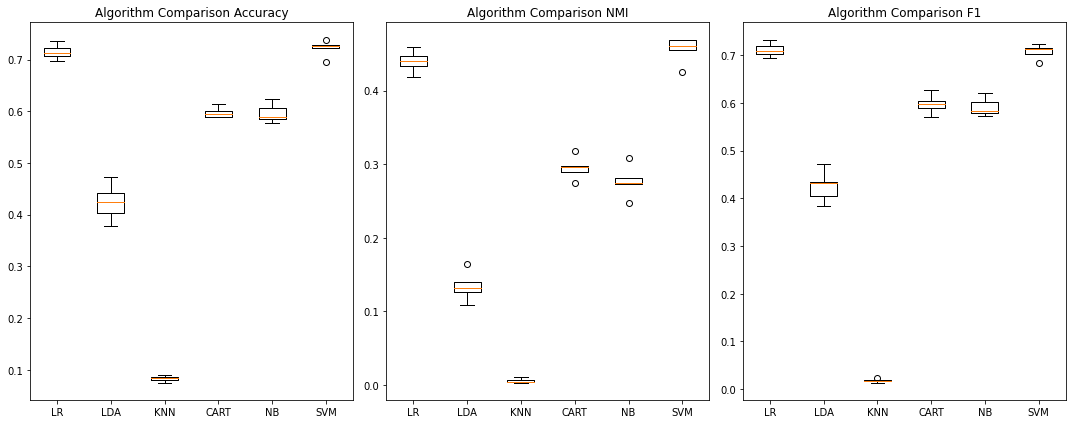

In [ ]:
results_Spot_Check_Algorithms = Spot_Check_Algorithms(X_train , Y_train)

Accuracy :  AB: 0.603161 (0.013899)
nmi :  AB: 0.305002 (0.015400)
f1_score :  AB: 0.596348 (0.010490)
############################################################
Accuracy :  LGBM: 0.708011 (0.010874)
nmi :  LGBM: 0.430161 (0.014773)
f1_score :  LGBM: 0.702888 (0.010414)
############################################################
Accuracy :  RF: 0.714774 (0.010247)
nmi :  RF: 0.448523 (0.018017)
f1_score :  RF: 0.709456 (0.018170)
############################################################
Accuracy :  ET: 0.721911 (0.007629)
nmi :  ET: 0.452013 (0.016514)
f1_score :  ET: 0.721147 (0.009237)
############################################################
Accuracy :  XGB: 0.705745 (0.013157)
nmi :  XGB: 0.428513 (0.019322)
f1_score :  XGB: 0.698250 (0.013090)
############################################################


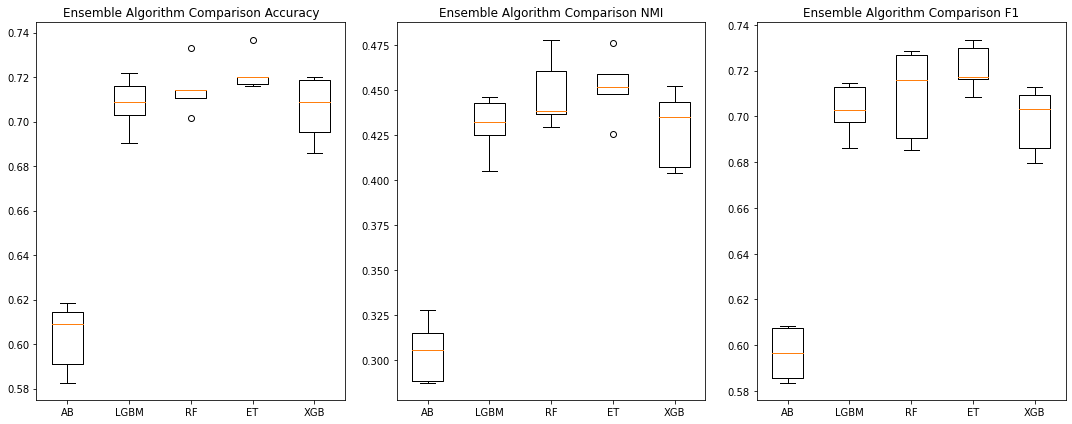

In [ ]:
results_ensembles = ensembles_methods(X_train , Y_train)

In [ ]:
frames = [results_Spot_Check_Algorithms, results_ensembles]

final_results = pd.concat(frames)
final_results

,Accuracy,NMI,F1_score
LR,0.714775,0.439796,0.711777
LDA,0.424277,0.134574,0.425721
KNN,0.083427,0.005821,0.017984
CART,0.597523,0.295231,0.597643
NB,0.596013,0.277037,0.591560
SVM,0.721919,0.455976,0.708118
AB,0.603161,0.305002,0.596348
LGBM,0.708011,0.430161,0.702888
RF,0.714774,0.448523,0.709456
ET,0.721911,0.452013,0.721147


In [ ]:
# Tune SVM

c_values =  np.logspace(-3, 5, num=10, endpoint=True, base=2.0) #[0.1, 1.0, 2.0]
kernel_values = ['linear', 'rbf'] # 'poly'
param_grid = dict(C=c_values, kernel=kernel_values)

model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring_accuracy, cv=kfold)
grid_result = grid.fit(X_train, Y_train.ravel())
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.724926 using {'C': 1.4697344922755986, 'kernel': 'rbf'}
0.695605 (0.012418) with: {'C': 0.125, 'kernel': 'linear'}
0.370552 (0.035429) with: {'C': 0.125, 'kernel': 'rbf'}
0.686961 (0.012907) with: {'C': 0.2314686780718226, 'kernel': 'linear'}
0.644887 (0.025813) with: {'C': 0.2314686780718226, 'kernel': 'rbf'}
0.681700 (0.015597) with: {'C': 0.4286219914265364, 'kernel': 'linear'}
0.698621 (0.016263) with: {'C': 0.4286219914265364, 'kernel': 'rbf'}
0.678317 (0.017235) with: {'C': 0.7937005259840997, 'kernel': 'linear'}
0.720789 (0.013320) with: {'C': 0.7937005259840997, 'kernel': 'rbf'}
0.678318 (0.017016) with: {'C': 1.4697344922755986, 'kernel': 'linear'}
0.724926 (0.016653) with: {'C': 1.4697344922755986, 'kernel': 'rbf'}
0.678318 (0.017016) with: {'C': 2.7215800003487542, 'kernel': 'linear'}
0.724172 (0.016733) with: {'C': 2.7215800003487542, 'kernel': 'rbf'}
0.678318 (0.017016) with: {'C': 5.039684199579492, 'kernel': 'linear'}
0.722669 (0.016555) with: {'C': 5.03968419957

##############################################################
Accuracy = 	 0.7477477477477478
##############################################################
              precision    recall  f1-score   support

           1       0.58      0.38      0.46        50
           2       0.70      0.78      0.74       113
           3       0.75      0.73      0.74       126
           4       0.79      0.80      0.79       150
           5       0.82      0.82      0.82       129
           6       0.71      0.74      0.73        98

    accuracy                           0.75       666
   macro avg       0.72      0.71      0.71       666
weighted avg       0.74      0.75      0.74       666

##############################################################


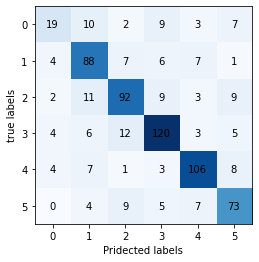

In [ ]:
# Finalize Model

# prepare the model
model = SVC(kernel='rbf' , C = 1.4697344922755986)
model.fit(X_train, Y_train.ravel())

# estimate accuracy on validation dataset
predictions = model.predict(X_test)
print("##############################################################")
print("Accuracy = \t" , accuracy_score(Y_test, predictions))
print("##############################################################")
print(classification_report(Y_test, predictions))
confusion_matrice = confusion_matrix(Y_test, predictions)
print("##############################################################")
# Plot confusion matrix
plt.imshow(confusion_matrice,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(confusion_matrice):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("Pridected labels")
plt.ylabel("true labels")
plt.show()

### Cora

In [ ]:
X = cora['fea']
n = X.shape[0] # le nombre d’individus
d = X.shape[1] # le nombre de variable
y = cora['gnd']

In [ ]:
cora['gnd'].shape

In [ ]:
n

In [ ]:
X.shape

In [ ]:
X

In [ ]:
y

In [ ]:
X_df = pd.DataFrame(data = X)
X_df

In [ ]:
X_df.dtypes

In [ ]:
X_df.describe()

In [ ]:
X_df.groupby(3).size()

In [ ]:
y_df  = pd.DataFrame(data = y)
y_df

In [ ]:
np.unique(y) # On a 7 classes

array([1, 2, 3, 4, 5, 6, 7], dtype=uint8)

In [ ]:
# Prepare Data

# Split-out validation dataset

validation_size = 0.20
seed_split = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=validation_size, random_state=seed_split)


Accuracy :  LR: 0.761300 (0.016451)
nmi :  LR: 0.525791 (0.027827)
f1_score :  LR: 0.759674 (0.017263)
############################################################
Accuracy :  LDA: 0.439514 (0.018657)
nmi :  LDA: 0.161593 (0.017255)
f1_score :  LDA: 0.442841 (0.020043)
############################################################
Accuracy :  KNN: 0.464446 (0.017722)
nmi :  KNN: 0.180378 (0.013965)
f1_score :  KNN: 0.436113 (0.020732)
############################################################
Accuracy :  CART: 0.652339 (0.022306)
nmi :  CART: 0.377192 (0.030013)
f1_score :  CART: 0.652862 (0.015702)
############################################################
Accuracy :  NB: 0.507848 (0.029271)
nmi :  NB: 0.212397 (0.020262)
f1_score :  NB: 0.503734 (0.030353)
############################################################
Accuracy :  SVM: 0.736370 (0.018799)
nmi :  SVM: 0.524859 (0.027555)
f1_score :  SVM: 0.732821 (0.018361)
############################################################


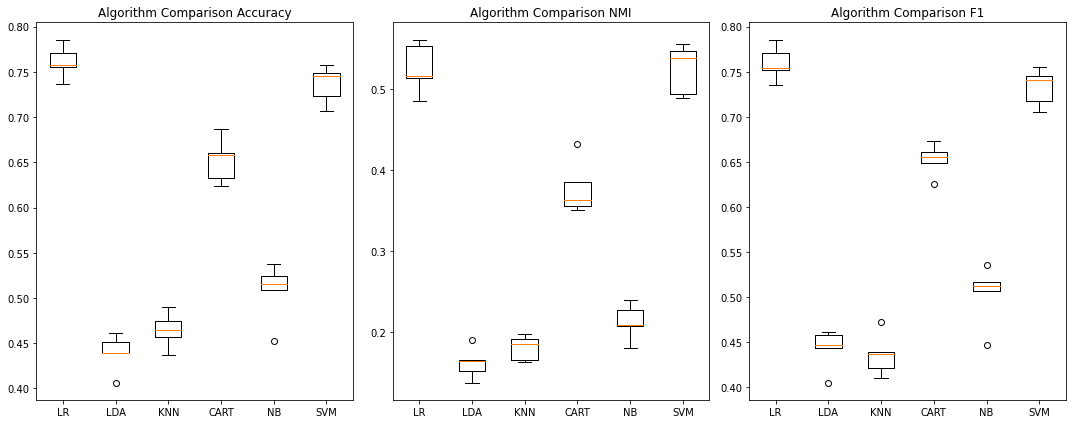

In [ ]:
results_Spot_Check_Algorithms = Spot_Check_Algorithms(X_train , Y_train)

Accuracy :  AB: 0.523526 (0.039643)
nmi :  AB: 0.298441 (0.019174)
f1_score :  AB: 0.526901 (0.037414)
############################################################
Accuracy :  LGBM: 0.745607 (0.028054)
nmi :  LGBM: 0.498583 (0.036165)
f1_score :  LGBM: 0.743325 (0.028107)
############################################################
Accuracy :  RF: 0.758996 (0.014756)
nmi :  RF: 0.531876 (0.022295)
f1_score :  RF: 0.756984 (0.018498)
############################################################
Accuracy :  ET: 0.761297 (0.018499)
nmi :  ET: 0.515942 (0.033669)
f1_score :  ET: 0.760916 (0.015906)
############################################################
Accuracy :  XGB: 0.756218 (0.019894)
nmi :  XGB: 0.518374 (0.022540)
f1_score :  XGB: 0.753224 (0.020539)
############################################################


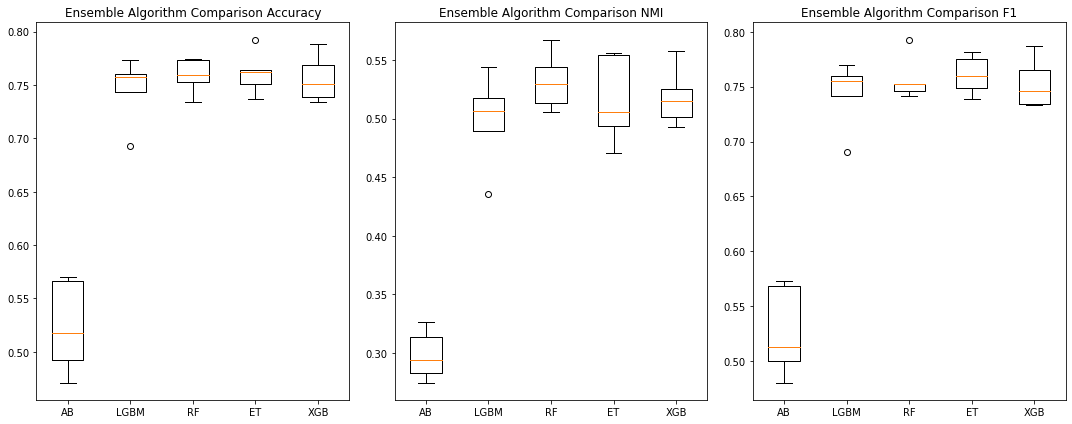

In [ ]:
results_ensembles = ensembles_methods(X_train , Y_train)

In [ ]:
frames = [results_Spot_Check_Algorithms, results_ensembles]

final_results = pd.concat(frames)
final_results

,Accuracy,NMI,F1_score
LR,0.761300,0.525791,0.759674
LDA,0.439514,0.161593,0.442841
KNN,0.464446,0.180378,0.436113
CART,0.652339,0.377192,0.652862
NB,0.507848,0.212397,0.503734
SVM,0.736370,0.524859,0.732821
AB,0.523526,0.298441,0.526901
LGBM,0.745607,0.498583,0.743325
RF,0.758996,0.531876,0.756984
ET,0.761297,0.515942,0.760916


In [ ]:
# Tune scaled KNN

neighbors = [1,2,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring_accuracy, cv=kfold)
grid_result = grid.fit(X_train, Y_train.ravel())
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.488909 using {'n_neighbors': 9}
0.452894 (0.023544) with: {'n_neighbors': 1}
0.392440 (0.023052) with: {'n_neighbors': 2}
0.417359 (0.032641) with: {'n_neighbors': 3}
0.464446 (0.017722) with: {'n_neighbors': 5}
0.475526 (0.014060) with: {'n_neighbors': 7}
0.488909 (0.017545) with: {'n_neighbors': 9}
0.477831 (0.017957) with: {'n_neighbors': 11}
0.486130 (0.027443) with: {'n_neighbors': 13}
0.474132 (0.019369) with: {'n_neighbors': 15}
0.463978 (0.019581) with: {'n_neighbors': 17}
0.457974 (0.018335) with: {'n_neighbors': 19}
0.453352 (0.021813) with: {'n_neighbors': 21}


In [ ]:
# Tune SVM

c_values =  np.logspace(-3, 5, num=10, endpoint=True, base=2.0) #[0.1, 1.0, 2.0]
kernel_values = ['linear', 'rbf'] # 'poly'
param_grid = dict(C=c_values, kernel=kernel_values)

model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring_accuracy, cv=kfold)
grid_result = grid.fit(X_train, Y_train.ravel())
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.758996 using {'C': 2.7215800003487542, 'kernel': 'rbf'}
0.743304 (0.011932) with: {'C': 0.125, 'kernel': 'linear'}
0.306552 (0.030747) with: {'C': 0.125, 'kernel': 'rbf'}
0.733141 (0.013409) with: {'C': 0.2314686780718226, 'kernel': 'linear'}
0.394739 (0.035773) with: {'C': 0.2314686780718226, 'kernel': 'rbf'}
0.727597 (0.016508) with: {'C': 0.4286219914265364, 'kernel': 'linear'}
0.573855 (0.036154) with: {'C': 0.4286219914265364, 'kernel': 'rbf'}
0.708201 (0.018794) with: {'C': 0.7937005259840997, 'kernel': 'linear'}
0.705436 (0.020785) with: {'C': 0.7937005259840997, 'kernel': 'rbf'}
0.701278 (0.017172) with: {'C': 1.4697344922755986, 'kernel': 'linear'}
0.749759 (0.017391) with: {'C': 1.4697344922755986, 'kernel': 'rbf'}
0.694355 (0.013530) with: {'C': 2.7215800003487542, 'kernel': 'linear'}
0.758996 (0.017287) with: {'C': 2.7215800003487542, 'kernel': 'rbf'}
0.684201 (0.011317) with: {'C': 5.039684199579492, 'kernel': 'linear'}
0.746991 (0.018899) with: {'C': 5.03968419957

##############################################################
Accuracy = 	 0.7915129151291513
##############################################################
              precision    recall  f1-score   support

           1       0.67      0.67      0.67        79
           2       0.88      0.79      0.84        29
           3       0.94      0.86      0.90        94
           4       0.75      0.86      0.80       162
           5       0.78      0.79      0.78        84
           6       0.83      0.75      0.79        57
           7       0.86      0.65      0.74        37

    accuracy                           0.79       542
   macro avg       0.82      0.77      0.79       542
weighted avg       0.80      0.79      0.79       542

##############################################################


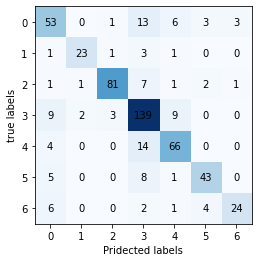

In [ ]:
# Finalize Model

# prepare the model
model = SVC(kernel='rbf' , C = 2.7215800003487542)
model.fit(X_train, Y_train.ravel())

# estimate accuracy on validation dataset
predictions = model.predict(X_test)
print("##############################################################")
print("Accuracy = \t" , accuracy_score(Y_test, predictions))
print("##############################################################")
print(classification_report(Y_test, predictions))
confusion_matrice = confusion_matrix(Y_test, predictions)
print("##############################################################")
# Plot confusion matrix
plt.imshow(confusion_matrice,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(confusion_matrice):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("Pridected labels")
plt.ylabel("true labels")
plt.show()

In [ ]:
# Tune ExtraTrees

n_estimators_values =  [20,50, 100, 150, 200]
min_samples_split_values = [1,2,4,7,10]
max_features_values = [4, 7, 10, 15, 20]
max_depth_values = [4, 8, 12, 16, 20]
param_grid = dict(n_estimators= n_estimators_values , min_samples_split= min_samples_split_values, max_features= max_features_values, max_depth= max_depth_values)

model = ExtraTreesClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring_accuracy, cv=kfold)
grid_result = grid.fit(X_train, Y_train.ravel())
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
625 fits failed out of a total of 3125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
625 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/

Best: 0.690197 using {'max_depth': 20, 'max_features': 20, 'min_samples_split': 7, 'n_estimators': 150}
nan (nan) with: {'max_depth': 4, 'max_features': 4, 'min_samples_split': 1, 'n_estimators': 20}
nan (nan) with: {'max_depth': 4, 'max_features': 4, 'min_samples_split': 1, 'n_estimators': 50}
nan (nan) with: {'max_depth': 4, 'max_features': 4, 'min_samples_split': 1, 'n_estimators': 100}
nan (nan) with: {'max_depth': 4, 'max_features': 4, 'min_samples_split': 1, 'n_estimators': 150}
nan (nan) with: {'max_depth': 4, 'max_features': 4, 'min_samples_split': 1, 'n_estimators': 200}
0.306555 (0.031159) with: {'max_depth': 4, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 20}
0.302860 (0.029524) with: {'max_depth': 4, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 50}
0.303322 (0.030071) with: {'max_depth': 4, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 100}
0.302860 (0.029524) with: {'max_depth': 4, 'max_features': 4, 'min_samples_split': 2, 'n_estim

In [ ]:
grid_result.best_params_

{'max_depth': 20,
 'max_features': 20,
 'min_samples_split': 7,
 'n_estimators': 150}

##############################################################
Accuracy = 	 0.6642066420664207
##############################################################
              precision    recall  f1-score   support

           1       0.64      0.32      0.42        79
           2       0.82      0.48      0.61        29
           3       0.93      0.81      0.86        94
           4       0.51      0.96      0.66       162
           5       0.92      0.57      0.71        84
           6       0.86      0.44      0.58        57
           7       0.94      0.46      0.62        37

    accuracy                           0.66       542
   macro avg       0.80      0.58      0.64       542
weighted avg       0.75      0.66      0.66       542

##############################################################


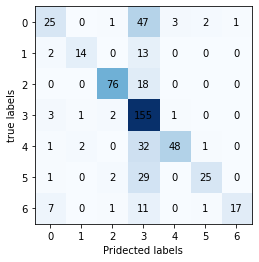

In [ ]:
# Finalize Model

# prepare the model
model = ExtraTreesClassifier(max_depth = 20, max_features = 20, min_samples_split= 7, n_estimators = 150)
model.fit(X_train, Y_train.ravel())

# estimate accuracy on validation dataset
predictions = model.predict(X_test)
print("##############################################################")
print("Accuracy = \t" , accuracy_score(Y_test, predictions))
print("##############################################################")
print(classification_report(Y_test, predictions))
confusion_matrice = confusion_matrix(Y_test, predictions)
print("##############################################################")
# Plot confusion matrix
plt.imshow(confusion_matrice,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(confusion_matrice):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("Pridected labels")
plt.ylabel("true labels")
plt.show()

In [ ]:
# Tune Logistic Regression

penalty_values =  ['l1', 'l2', 'elasticnet']
C_values = [.01, .1, 1, 10,100]
solver_values = ['newton-cg', 'lbfgs', 'liblinear']

param_grid = dict(penalty= penalty_values , C= C_values, solver= solver_values)

model = LogisticRegression(max_iter=300)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring_accuracy, cv=kfold)
grid_result = grid.fit(X_train, Y_train.ravel())
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
grid_result.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

##############################################################
Accuracy = 	 0.7878228782287823
##############################################################
              precision    recall  f1-score   support

           1       0.67      0.71      0.69        79
           2       0.81      0.72      0.76        29
           3       0.92      0.87      0.90        94
           4       0.79      0.81      0.80       162
           5       0.81      0.80      0.80        84
           6       0.77      0.75      0.76        57
           7       0.70      0.70      0.70        37

    accuracy                           0.79       542
   macro avg       0.78      0.77      0.77       542
weighted avg       0.79      0.79      0.79       542

##############################################################


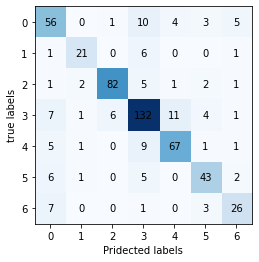

In [ ]:
# Finalize Model

# prepare the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train.ravel())

# estimate accuracy on validation dataset
predictions = model.predict(X_test)
print("##############################################################")
print("Accuracy = \t" , accuracy_score(Y_test, predictions))
print("##############################################################")
print(classification_report(Y_test, predictions))
confusion_matrice = confusion_matrix(Y_test, predictions)
print("##############################################################")
# Plot confusion matrix
plt.imshow(confusion_matrice,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(confusion_matrice):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("Pridected labels")
plt.ylabel("true labels")
plt.show()

### pubmed

In [ ]:
X = pubmed['fea']
n = X.shape[0] # le nombre d’individus
d = X.shape[1] # le nombre de variable
y = pubmed['gnd']

In [ ]:
pubmed['gnd'].shape

In [ ]:
n

In [ ]:
X.shape

In [ ]:
X

In [ ]:
y

In [ ]:
X_df = pd.DataFrame(data = X)
X_df

In [ ]:
X_df.dtypes

In [ ]:
X_df.describe()

In [ ]:
X_df.groupby(3).size()

In [ ]:
y_df  = pd.DataFrame(data = y)
y_df

In [ ]:
np.unique(y) # On a 3 classes

array([1, 2, 3], dtype=uint8)

In [ ]:
# Prepare Data

# Split-out validation dataset

validation_size = 0.20
seed_split = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=validation_size, random_state=seed_split)


Accuracy :  LR: 0.858238 (0.006635)
nmi :  LR: 0.538425 (0.014378)
f1_score :  LR: 0.857966 (0.006651)
############################################################
Accuracy :  LDA: 0.863944 (0.006105)
nmi :  LDA: 0.550660 (0.014988)
f1_score :  LDA: 0.863821 (0.006118)
############################################################
Accuracy :  KNN: 0.764662 (0.002858)
nmi :  KNN: 0.368190 (0.005828)
f1_score :  KNN: 0.763349 (0.002751)
############################################################
Accuracy :  CART: 0.817409 (0.004989)
nmi :  CART: 0.447829 (0.012101)
f1_score :  CART: 0.815615 (0.005684)
############################################################
Accuracy :  NB: 0.752297 (0.012896)
nmi :  NB: 0.378151 (0.022200)
f1_score :  NB: 0.748668 (0.013163)
############################################################
Accuracy :  SVM: 0.876053 (0.008018)
nmi :  SVM: 0.579818 (0.019155)
f1_score :  SVM: 0.875993 (0.008014)
############################################################


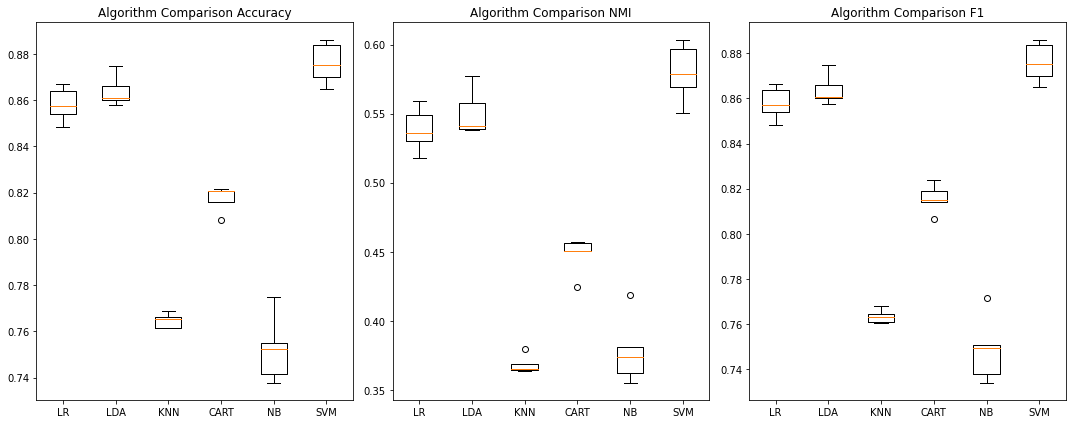

In [ ]:
results_Spot_Check_Algorithms = Spot_Check_Algorithms(X_train , Y_train)

Accuracy :  AB: 0.828124 (0.004806)
nmi :  AB: 0.482297 (0.010400)
f1_score :  AB: 0.827699 (0.004794)
############################################################
Accuracy :  LGBM: 0.902618 (0.002237)
nmi :  LGBM: 0.643765 (0.005639)
f1_score :  LGBM: 0.902553 (0.002275)
############################################################
Accuracy :  RF: 0.888036 (0.005171)
nmi :  RF: 0.608013 (0.012108)
f1_score :  RF: 0.887196 (0.003779)
############################################################
Accuracy :  ET: 0.878716 (0.005513)
nmi :  ET: 0.588573 (0.013703)
f1_score :  ET: 0.878893 (0.004302)
############################################################
Accuracy :  XGB: 0.897103 (0.003637)
nmi :  XGB: 0.629074 (0.009867)
f1_score :  XGB: 0.897059 (0.003648)
############################################################


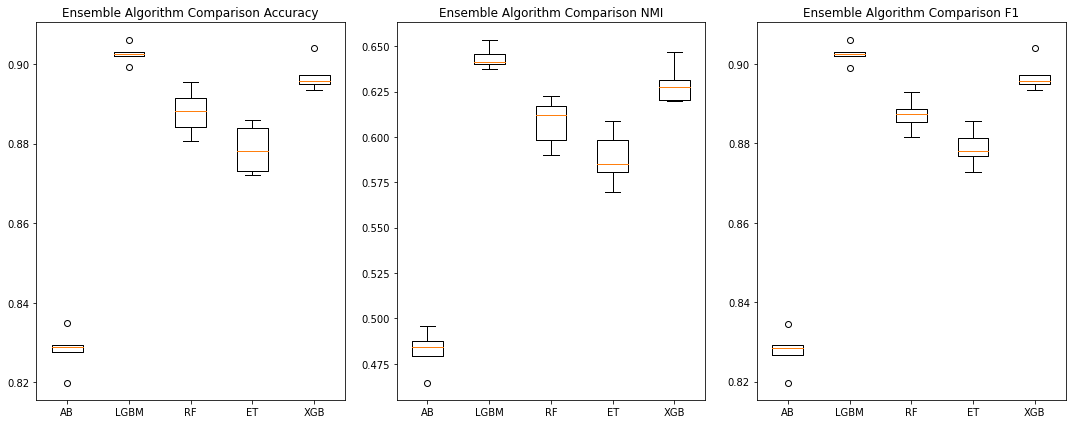

In [ ]:
results_ensembles = ensembles_methods(X_train , Y_train)

In [ ]:
frames = [results_Spot_Check_Algorithms, results_ensembles]

final_results = pd.concat(frames)
final_results

,Accuracy,NMI,F1_score
LR,0.858238,0.538425,0.857966
LDA,0.863944,0.550660,0.863821
KNN,0.764662,0.368190,0.763349
CART,0.817409,0.447829,0.815615
NB,0.752297,0.378151,0.748668
SVM,0.876053,0.579818,0.875993
AB,0.828124,0.482297,0.827699
LGBM,0.902618,0.643765,0.902553
RF,0.888036,0.608013,0.887196
ET,0.878716,0.588573,0.878893


In [ ]:
# Tune scaled KNN

neighbors = [1,2,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring_accuracy, cv=kfold)
grid_result = grid.fit(X_train, Y_train.ravel())
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.764662 using {'n_neighbors': 5}
0.734863 (0.008643) with: {'n_neighbors': 1}
0.727192 (0.004554) with: {'n_neighbors': 2}
0.760224 (0.004851) with: {'n_neighbors': 3}
0.764662 (0.002858) with: {'n_neighbors': 5}
0.762632 (0.003560) with: {'n_neighbors': 7}
0.761555 (0.004645) with: {'n_neighbors': 9}
0.759970 (0.006883) with: {'n_neighbors': 11}
0.755658 (0.006449) with: {'n_neighbors': 13}
0.752108 (0.005549) with: {'n_neighbors': 15}
0.747353 (0.004487) with: {'n_neighbors': 17}
0.744500 (0.004570) with: {'n_neighbors': 19}
0.741203 (0.004514) with: {'n_neighbors': 21}


In [ ]:
# Tune SVM

c_values =  np.logspace(-3, 5, num=10, endpoint=True, base=2.0) #[0.1, 1.0, 2.0]
kernel_values = ['linear', 'rbf'] # 'poly'
param_grid = dict(C=c_values, kernel=kernel_values)

model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring_accuracy, cv=kfold)
grid_result = grid.fit(X_train, Y_train.ravel())
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.881886 using {'C': 5.039684199579492, 'kernel': 'rbf'}
0.799657 (0.007251) with: {'C': 0.125, 'kernel': 'linear'}
0.838014 (0.004612) with: {'C': 0.125, 'kernel': 'rbf'}
0.830723 (0.005829) with: {'C': 0.2314686780718226, 'kernel': 'linear'}
0.852469 (0.005872) with: {'C': 0.2314686780718226, 'kernel': 'rbf'}
0.848538 (0.005064) with: {'C': 0.4286219914265364, 'kernel': 'linear'}
0.864198 (0.007008) with: {'C': 0.4286219914265364, 'kernel': 'rbf'}
0.859697 (0.005961) with: {'C': 0.7937005259840997, 'kernel': 'linear'}
0.872883 (0.007852) with: {'C': 0.7937005259840997, 'kernel': 'rbf'}
0.864642 (0.007883) with: {'C': 1.4697344922755986, 'kernel': 'linear'}
0.879667 (0.007243) with: {'C': 1.4697344922755986, 'kernel': 'rbf'}
0.869143 (0.008868) with: {'C': 2.7215800003487542, 'kernel': 'linear'}
0.881823 (0.007450) with: {'C': 2.7215800003487542, 'kernel': 'rbf'}
0.871235 (0.009266) with: {'C': 5.039684199579492, 'kernel': 'linear'}
0.881886 (0.007383) with: {'C': 5.039684199579

##############################################################
Accuracy = 	 0.896551724137931
##############################################################
              precision    recall  f1-score   support

           1       0.87      0.90      0.88       819
           2       0.90      0.91      0.91      1514
           3       0.91      0.88      0.89      1611

    accuracy                           0.90      3944
   macro avg       0.89      0.90      0.89      3944
weighted avg       0.90      0.90      0.90      3944

##############################################################


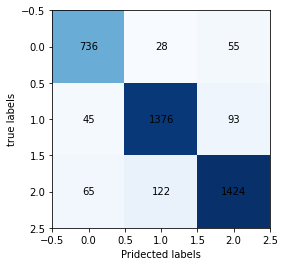

In [ ]:
# Finalize Model

# prepare the model
model = SVC(kernel='rbf' , C = 5.039684199579492)
model.fit(X_train, Y_train.ravel())

# estimate accuracy on validation dataset
predictions = model.predict(X_test)
print("##############################################################")
print("Accuracy = \t" , accuracy_score(Y_test, predictions))
print("##############################################################")
print(classification_report(Y_test, predictions))
confusion_matrice = confusion_matrix(Y_test, predictions)
print("##############################################################")
# Plot confusion matrix
plt.imshow(confusion_matrice,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(confusion_matrice):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("Pridected labels")
plt.ylabel("true labels")
plt.show()

In [ ]:
# Tune LGBM Classifier

max_depth_values = [5,10]
learning_rate_values = [0.05,0.1]
colsample_bytree_values = [0.8,0.95]

           
param_grid = dict(max_depth= max_depth_values , learning_rate= learning_rate_values ,colsample_bytree = colsample_bytree_values )

model = lgb.LGBMClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring_accuracy, cv=kfold)
grid_result = grid.fit(X_train, Y_train.ravel())
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.900209 using {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10}
0.883218 (0.004202) with: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5}
0.894630 (0.005344) with: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 10}
0.894059 (0.004426) with: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5}
0.900209 (0.002676) with: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10}
0.883852 (0.004121) with: {'colsample_bytree': 0.95, 'learning_rate': 0.05, 'max_depth': 5}
0.893552 (0.003507) with: {'colsample_bytree': 0.95, 'learning_rate': 0.05, 'max_depth': 10}
0.896849 (0.004188) with: {'colsample_bytree': 0.95, 'learning_rate': 0.1, 'max_depth': 5}
0.900145 (0.003545) with: {'colsample_bytree': 0.95, 'learning_rate': 0.1, 'max_depth': 10}


In [ ]:
grid_result.best_params_

{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10}

##############################################################
Accuracy = 	 0.9158215010141988
##############################################################
              precision    recall  f1-score   support

           1       0.90      0.91      0.90       819
           2       0.93      0.92      0.92      1514
           3       0.92      0.91      0.91      1611

    accuracy                           0.92      3944
   macro avg       0.91      0.92      0.91      3944
weighted avg       0.92      0.92      0.92      3944

##############################################################


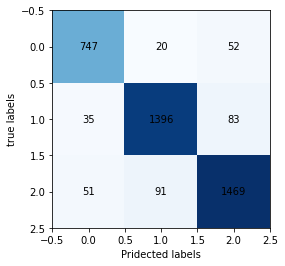

In [ ]:
# Finalize Model

# prepare the model
model = lgb.LGBMClassifier(max_depth= 10 , learning_rate= 0.1 ,colsample_bytree = 0.8 )
model.fit(X_train, Y_train.ravel())

# estimate accuracy on validation dataset
predictions = model.predict(X_test)
print("##############################################################")
print("Accuracy = \t" , accuracy_score(Y_test, predictions))
print("##############################################################")
print(classification_report(Y_test, predictions))
confusion_matrice = confusion_matrix(Y_test, predictions)
print("##############################################################")
# Plot confusion matrix
plt.imshow(confusion_matrice,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(confusion_matrice):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("Pridected labels")
plt.ylabel("true labels")
plt.show()

## 2. Une Combinaison des informations W et X ; M=D^(-1)*W*X, où D est une matrice diagonale, chaque valeur diagonale correspond à la somme des valeurs d’une ligne de W.

### citeseer

In [ ]:
X = citeseer['fea']
W = citeseer['W']
y = citeseer['gnd']
 

In [ ]:
W

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
sum_W = np.sum( W , axis=1)  
sum_W

array([1, 5, 1, ..., 3, 1, 1], dtype=uint64)

In [ ]:
D = np.diag(sum_W)
D

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint64)

In [ ]:
# Calculating the inverse of the matrix
D_inv = np.linalg.inv(D)
D_inv

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.2       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.33333333, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
D_inv.shape

(3327, 3327)

In [ ]:
M = D_inv @ W @ X

In [ ]:
M

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0.2, 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [ ]:
M.shape

(3327, 3703)

In [ ]:
M_df = pd.DataFrame(data = M)
M_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3663,3664,3665,3666,3667,3668,3669,3670,3671,3672,3673,3674,3675,3676,3677,3678,3679,3680,3681,3682,3683,3684,3685,3686,3687,3688,3689,3690,3691,3692,3693,3694,3695,3696,3697,3698,3699,3700,3701,3702
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
M_df.groupby(3).size()

3
0.000000    3290
0.019608       1
0.043478       1
0.055556       1
0.062500       1
0.083333       1
0.090909       2
0.166667       8
0.200000       2
0.222222       1
0.250000       8
0.333333       2
0.500000       3
0.666667       1
1.000000       5
dtype: int64

In [ ]:
cols = list(M_df.columns)
for i in cols:
    if (M_df[i] == 0).all():
        print('Are all values are 0 in any column? Yes in the column : ' , i)

In [ ]:
np.unique(y) # On a 6 classes

array([1, 2, 3, 4, 5, 6], dtype=uint8)

In [ ]:
# Prepare Data

# Split-out validation dataset

validation_size = 0.20
seed_split = 7
X_train, X_test, Y_train, Y_test = train_test_split(M, y, test_size=validation_size, random_state=seed_split)


Accuracy :  LR: 0.699732 (0.015563)
nmi :  LR: 0.416276 (0.016143)
f1_score :  LR: 0.696597 (0.015316)
############################################################
Accuracy :  LDA: 0.517853 (0.022495)
nmi :  LDA: 0.201321 (0.021443)
f1_score :  LDA: 0.519846 (0.024437)
############################################################
Accuracy :  KNN: 0.579841 (0.027088)
nmi :  KNN: 0.338022 (0.020143)
f1_score :  KNN: 0.571509 (0.023465)
############################################################
Accuracy :  CART: 0.592642 (0.018056)
nmi :  CART: 0.291824 (0.008311)
f1_score :  CART: 0.595636 (0.012530)
############################################################
Accuracy :  NB: 0.654646 (0.008479)
nmi :  NB: 0.353589 (0.014170)
f1_score :  NB: 0.651192 (0.007912)
############################################################
Accuracy :  SVM: 0.721160 (0.012892)
nmi :  SVM: 0.450947 (0.014091)
f1_score :  SVM: 0.709246 (0.013358)
############################################################


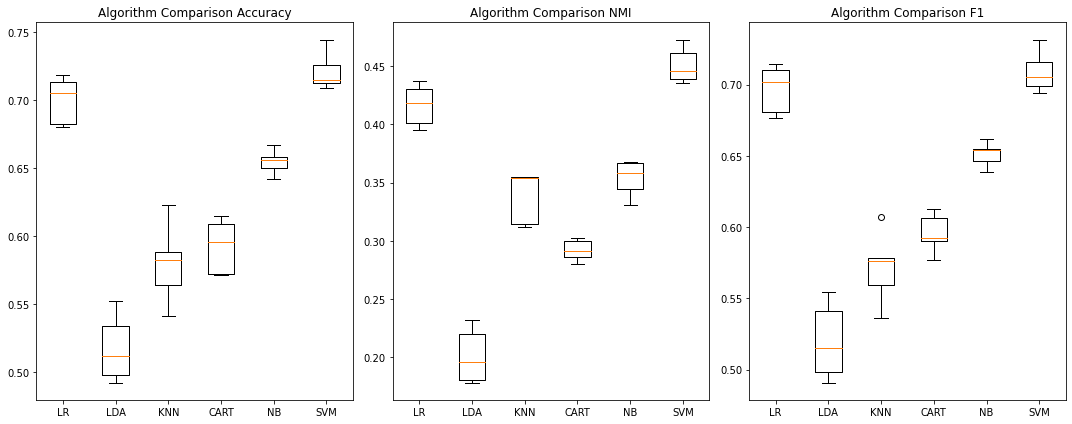

In [ ]:
results_Spot_Check_Algorithms = Spot_Check_Algorithms(X_train , Y_train)

Accuracy :  AB: 0.600913 (0.024117)
nmi :  AB: 0.300500 (0.026832)
f1_score :  AB: 0.587935 (0.020624)
############################################################
Accuracy :  LGBM: 0.702375 (0.021507)
nmi :  LGBM: 0.420397 (0.023521)
f1_score :  LGBM: 0.695683 (0.022406)
############################################################
Accuracy :  RF: 0.708759 (0.013650)
nmi :  RF: 0.429904 (0.014019)
f1_score :  RF: 0.698864 (0.014562)
############################################################
Accuracy :  ET: 0.709512 (0.009709)
nmi :  ET: 0.436489 (0.007208)
f1_score :  ET: 0.702881 (0.013503)
############################################################
Accuracy :  XGB: 0.697113 (0.021243)
nmi :  XGB: 0.414963 (0.022498)
f1_score :  XGB: 0.689784 (0.022261)
############################################################


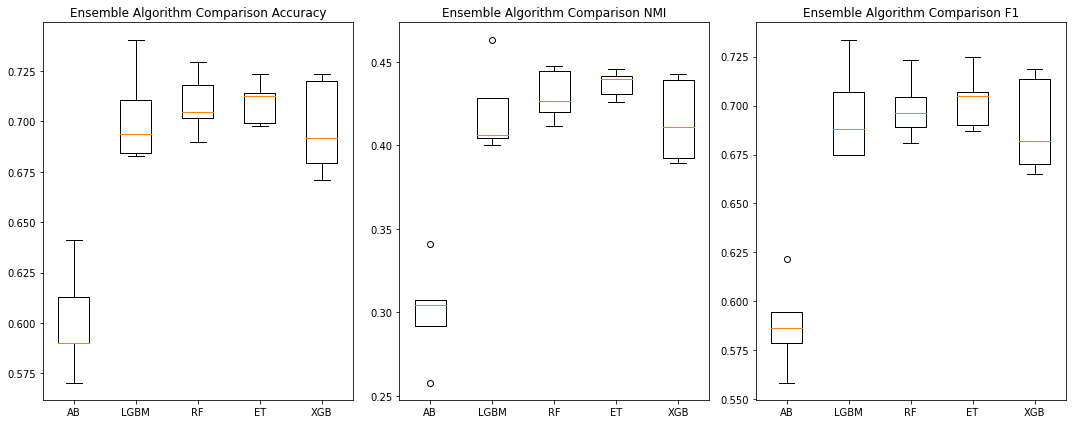

In [ ]:
results_ensembles = ensembles_methods(X_train , Y_train)

In [ ]:
frames = [results_Spot_Check_Algorithms, results_ensembles]

final_results = pd.concat(frames)
final_results

,Accuracy,NMI,F1_score
LR,0.699732,0.416276,0.696597
LDA,0.517853,0.201321,0.519846
KNN,0.579841,0.338022,0.571509
CART,0.592642,0.291824,0.595636
NB,0.654646,0.353589,0.651192
SVM,0.721160,0.450947,0.709246
AB,0.600913,0.300500,0.587935
LGBM,0.702375,0.420397,0.695683
RF,0.708759,0.429904,0.698864
ET,0.709512,0.436489,0.702881


In [ ]:
# Tune SVM

c_values =  np.logspace(-3, 5, num=10, endpoint=True, base=2.0) #[0.1, 1.0, 2.0]
kernel_values = ['linear', 'rbf'] # 'poly'
param_grid = dict(C=c_values, kernel=kernel_values)

model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring_accuracy, cv=kfold)
grid_result = grid.fit(X_train, Y_train.ravel())
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.722665 using {'C': 0.7937005259840997, 'kernel': 'rbf'}
0.708005 (0.016748) with: {'C': 0.125, 'kernel': 'linear'}
0.551316 (0.037431) with: {'C': 0.125, 'kernel': 'rbf'}
0.694848 (0.020692) with: {'C': 0.2314686780718226, 'kernel': 'linear'}
0.644510 (0.030422) with: {'C': 0.2314686780718226, 'kernel': 'rbf'}
0.677185 (0.016852) with: {'C': 0.4286219914265364, 'kernel': 'linear'}
0.692605 (0.018893) with: {'C': 0.4286219914265364, 'kernel': 'rbf'}
0.667034 (0.021538) with: {'C': 0.7937005259840997, 'kernel': 'linear'}
0.722665 (0.014305) with: {'C': 0.7937005259840997, 'kernel': 'rbf'}
0.663270 (0.023340) with: {'C': 1.4697344922755986, 'kernel': 'linear'}
0.718902 (0.010003) with: {'C': 1.4697344922755986, 'kernel': 'rbf'}
0.660267 (0.019965) with: {'C': 2.7215800003487542, 'kernel': 'linear'}
0.714389 (0.014349) with: {'C': 2.7215800003487542, 'kernel': 'rbf'}
0.663275 (0.016794) with: {'C': 5.039684199579492, 'kernel': 'linear'}
0.707247 (0.012837) with: {'C': 5.03968419957

##############################################################
Accuracy = 	 0.7297297297297297
##############################################################
              precision    recall  f1-score   support

           1       0.40      0.16      0.23        50
           2       0.61      0.72      0.66       113
           3       0.73      0.75      0.74       126
           4       0.76      0.80      0.78       150
           5       0.81      0.81      0.81       129
           6       0.80      0.80      0.80        98

    accuracy                           0.73       666
   macro avg       0.69      0.67      0.67       666
weighted avg       0.72      0.73      0.72       666

##############################################################


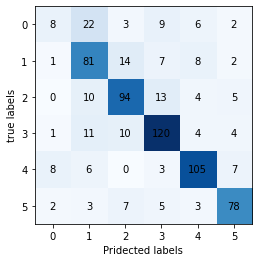

In [ ]:
# Finalize Model

# prepare the model
model = SVC(kernel='rbf' , C = 0.7937005259840997)
model.fit(X_train, Y_train.ravel())

# estimate accuracy on validation dataset
predictions = model.predict(X_test)
print("##############################################################")
print("Accuracy = \t" , accuracy_score(Y_test, predictions))
print("##############################################################")
print(classification_report(Y_test, predictions))
confusion_matrice = confusion_matrix(Y_test, predictions)
print("##############################################################")
# Plot confusion matrix
plt.imshow(confusion_matrice,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(confusion_matrice):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("Pridected labels")
plt.ylabel("true labels")
plt.show()

### Cora

In [ ]:
X = cora['fea']
W = cora['W']
y = cora['gnd']

In [ ]:
W

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [ ]:
sum_W = np.sum( W , axis=1)  
sum_W

array([3, 3, 5, ..., 1, 4, 4], dtype=uint64)

In [ ]:
D = np.diag(sum_W)
D

array([[3, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 5, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 4, 0],
       [0, 0, 0, ..., 0, 0, 4]], dtype=uint64)

In [ ]:
# Calculating the inverse of the matrix
D_inv = np.linalg.inv(D)
D_inv

array([[0.33333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.33333333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.2       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.25      ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25      ]])

In [ ]:
D_inv.shape

(2708, 2708)

In [ ]:
M = D_inv @ W @ X

In [ ]:
M

array([[0.        , 0.        , 0.        , ..., 0.        , 0.33333333,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
M.shape

(2708, 1433)

In [ ]:
M_df = pd.DataFrame(data = M)
M_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.333333,0.0
1,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.333333,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.2,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2704,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2705,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2706,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.25,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.000000,0.25,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [ ]:
M_df.groupby(444).size()

444
0.0    2708
dtype: int64

In [ ]:
cols = list(M_df.columns)
for i in cols:
    if (M_df[i] == 0).all():
        print('Are all values are 0 in any column? Yes in the column : ' , i)

Are all values are 0 in any column? Yes in the column :  444


In [ ]:
np.unique(y) # On a 7 classes

array([1, 2, 3, 4, 5, 6, 7], dtype=uint8)

In [ ]:
# Prepare Data

# Split-out validation dataset

validation_size = 0.20
seed_split = 7
X_train, X_test, Y_train, Y_test = train_test_split(M, y, test_size=validation_size, random_state=seed_split)


Accuracy :  LR: 0.831024 (0.010794)
nmi :  LR: 0.636897 (0.024705)
f1_score :  LR: 0.830789 (0.011290)
############################################################
Accuracy :  LDA: 0.568328 (0.017163)
nmi :  LDA: 0.280642 (0.013084)
f1_score :  LDA: 0.571904 (0.019631)
############################################################
Accuracy :  KNN: 0.793163 (0.015889)
nmi :  KNN: 0.589560 (0.030119)
f1_score :  KNN: 0.793501 (0.015972)
############################################################
Accuracy :  CART: 0.707306 (0.020907)
nmi :  CART: 0.470240 (0.022959)
f1_score :  CART: 0.720519 (0.021029)
############################################################
Accuracy :  NB: 0.706823 (0.022078)
nmi :  NB: 0.447257 (0.033202)
f1_score :  NB: 0.709178 (0.023963)
############################################################
Accuracy :  SVM: 0.807936 (0.014837)
nmi :  SVM: 0.614611 (0.029046)
f1_score :  SVM: 0.807997 (0.015038)
############################################################


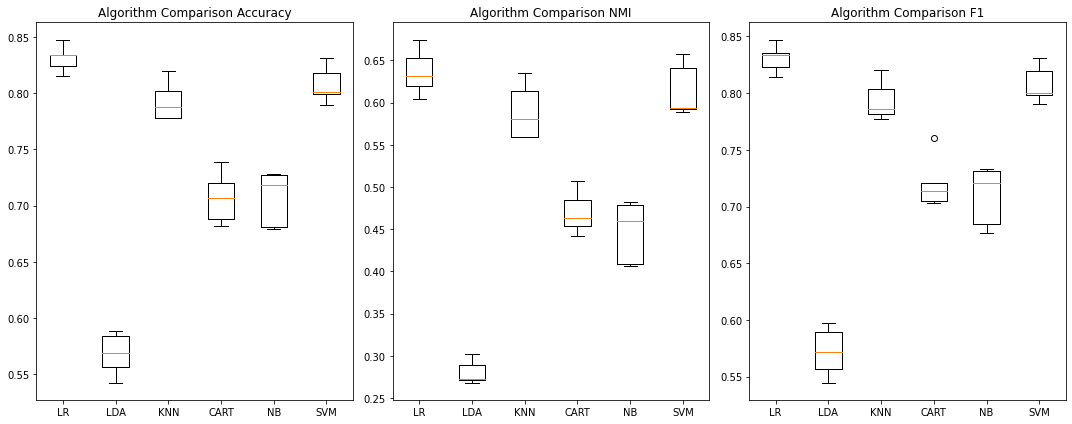

In [ ]:
results_Spot_Check_Algorithms = Spot_Check_Algorithms(X_train , Y_train)

Accuracy :  AB: 0.623281 (0.028312)
nmi :  AB: 0.403294 (0.052903)
f1_score :  AB: 0.624370 (0.026362)
############################################################
Accuracy :  LGBM: 0.815788 (0.023532)
nmi :  LGBM: 0.618988 (0.046127)
f1_score :  LGBM: 0.814581 (0.023910)
############################################################
Accuracy :  RF: 0.814864 (0.012291)
nmi :  RF: 0.632572 (0.031965)
f1_score :  RF: 0.821601 (0.014413)
############################################################
Accuracy :  ET: 0.832405 (0.020204)
nmi :  ET: 0.636290 (0.039856)
f1_score :  ET: 0.824853 (0.017502)
############################################################
Accuracy :  XGB: 0.809333 (0.021973)
nmi :  XGB: 0.606141 (0.042140)
f1_score :  XGB: 0.808399 (0.021953)
############################################################


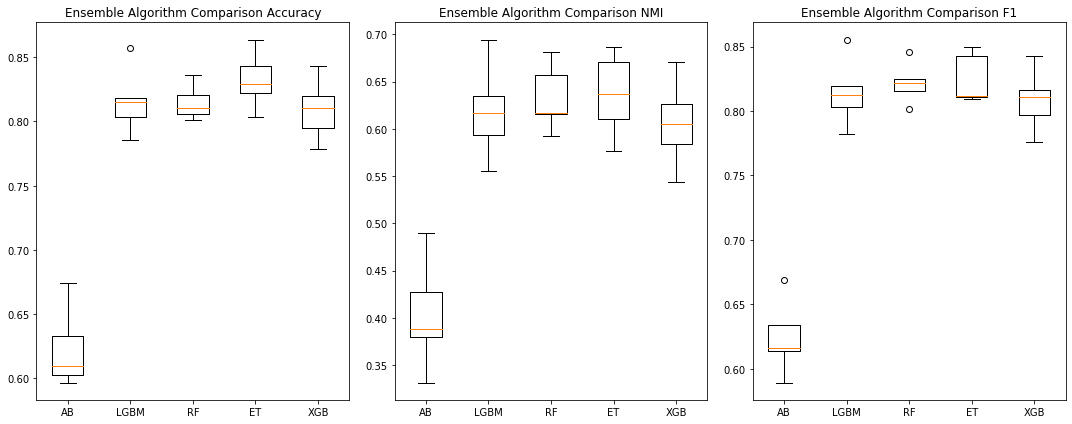

In [ ]:
results_ensembles = ensembles_methods(X_train , Y_train)

In [ ]:
frames = [results_Spot_Check_Algorithms, results_ensembles]

final_results = pd.concat(frames)
final_results

,Accuracy,NMI,F1_score
LR,0.831024,0.636897,0.830789
LDA,0.568328,0.280642,0.571904
KNN,0.793163,0.589560,0.793501
CART,0.707306,0.470240,0.720519
NB,0.706823,0.447257,0.709178
SVM,0.807936,0.614611,0.807997
AB,0.623281,0.403294,0.624370
LGBM,0.815788,0.618988,0.814581
RF,0.814864,0.632572,0.821601
ET,0.832405,0.636290,0.824853


In [ ]:
best_score , best_params = tune_SVM(X_train , Y_train)

Best: 0.833333 using {'C': 0.125, 'kernel': 'linear'}
0.833333 (0.013968) with: {'C': 0.125, 'kernel': 'linear'}
0.560933 (0.023818) with: {'C': 0.125, 'kernel': 'rbf'}
0.831025 (0.015829) with: {'C': 0.2314686780718226, 'kernel': 'linear'}
0.705444 (0.010799) with: {'C': 0.2314686780718226, 'kernel': 'rbf'}
0.821329 (0.015297) with: {'C': 0.4286219914265364, 'kernel': 'linear'}
0.769618 (0.008006) with: {'C': 0.4286219914265364, 'kernel': 'rbf'}
0.816709 (0.023652) with: {'C': 0.7937005259840997, 'kernel': 'linear'}
0.799626 (0.015943) with: {'C': 0.7937005259840997, 'kernel': 'rbf'}
0.803781 (0.017634) with: {'C': 1.4697344922755986, 'kernel': 'linear'}
0.818555 (0.015691) with: {'C': 1.4697344922755986, 'kernel': 'rbf'}
0.801472 (0.022953) with: {'C': 2.7215800003487542, 'kernel': 'linear'}
0.813933 (0.016398) with: {'C': 2.7215800003487542, 'kernel': 'rbf'}
0.797317 (0.021334) with: {'C': 5.039684199579492, 'kernel': 'linear'}
0.809780 (0.017763) with: {'C': 5.039684199579492, 'ker

In [ ]:
best_score

0.8333329785762178

##############################################################
Accuracy = 	 0.8579335793357934
##############################################################
              precision    recall  f1-score   support

           1       0.75      0.76      0.75        79
           2       0.86      0.83      0.84        29
           3       0.96      0.98      0.97        94
           4       0.86      0.90      0.88       162
           5       0.95      0.82      0.88        84
           6       0.79      0.72      0.75        57
           7       0.75      0.89      0.81        37

    accuracy                           0.86       542
   macro avg       0.84      0.84      0.84       542
weighted avg       0.86      0.86      0.86       542

##############################################################


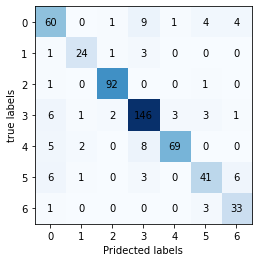

In [ ]:
Finalize_SVM_Model(X_train , Y_train , X_test , Y_test , best_params['kernel'] , best_params['C'])

### Pumbed

In [ ]:
X = pubmed['fea']
W = pubmed['W']
y = pubmed['gnd']

In [ ]:
W.shape

(19717, 19717)

In [ ]:
W

<19717x19717 sparse matrix of type '<class 'numpy.float64'>'
	with 88651 stored elements in Compressed Sparse Column format>

In [ ]:
sum_W = np.sum( W , axis=1)  
sum_W

matrix([[5.],
        [3.],
        [3.],
        ...,
        [1.],
        [1.],
        [1.]])

In [ ]:
new_W = np.squeeze(np.asarray(sum_W))
new_W

array([5., 3., 3., ..., 1., 1., 1.])

In [ ]:
D = np.diag(new_W)
D

array([[5., 0., 0., ..., 0., 0., 0.],
       [0., 3., 0., ..., 0., 0., 0.],
       [0., 0., 3., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
D.shape

(19717, 19717)

In [ ]:
D = csc_matrix(D) # to sparse matrix
D_inv = inv(D) # Calculating the inverse of the matrix
D_inv

<19717x19717 sparse matrix of type '<class 'numpy.float64'>'
	with 19717 stored elements in Compressed Sparse Column format>

In [ ]:
M = D_inv @ W @ X

In [ ]:
M

array([[0.        , 0.00543111, 0.00123201, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02205967, ..., 0.04779867, 0.        ,
        0.        ],
       [0.05371493, 0.        , 0.0162932 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.12858644, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
M.shape

(19717, 500)

In [ ]:
M_df = pd.DataFrame(data = M)
M_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,0.000000,0.005431,0.001232,0.0,0.0,0.0,0.0,0.005589,0.000000,0.002189,0.012289,0.000000,0.000000,0.000000,0.002396,0.0,0.009116,0.000000,0.010078,0.000000,0.000000,0.000000,0.008862,0.000000,0.000000,0.007175,0.0,0.002987,0.003891,0.014614,0.0,0.003268,0.000000,0.000000,0.0,0.004229,0.000000,0.000000,0.006032,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.020934,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0143,0.0000,0.000000,0.0,0.0,0.011657,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.007763,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.000000,0.000000,0.022060,0.0,0.0,0.0,0.0,0.005488,0.000000,0.007297,0.000000,0.000000,0.000000,0.000000,0.007035,0.0,0.012110,0.000000,0.019201,0.000000,0.018624,0.000000,0.003435,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.042903,0.009775,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.011096,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.010809,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.047799,0.0,0.0
2,0.053715,0.000000,0.016293,0.0,0.0,0.0,0.0,0.014546,0.060338,0.000000,0.000000,0.000000,0.008546,0.000000,0.031481,0.0,0.007676,0.000000,0.004629,0.000000,0.005659,0.023787,0.017450,0.009459,0.011576,0.005994,0.0,0.029476,0.000000,0.000000,0.0,0.041532,0.000000,0.000000,0.0,0.000000,0.006154,0.008038,0.009344,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.119096,0.0,0.0,0.000000,0.013983,0.015636,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.011604,0.000000,0.040059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.020617,0.0,0.000000,0.091991,0.000000,0.0,0.000000,0.053258,0.000000,0.029683,0.0,...,0.070328,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.049684,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.221053,0.000000,0.0,0.0
4,0.010735,0.000000,0.026880,0.0,0.0,0.0,0.0,0.006687,0.112459,0.011941,0.000000,0.000000,0.000000,0.008683,0.000000,0.0,0.003918,0.000000,0.006763,0.000000,0.000000,0.026876,0.000000,0.000000,0.117716,0.040634,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.018158,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19712,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.068555,0.000000,0.055765,0.000000,0.000000,0.0,0.007543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.047352,0.0,0.0,0.0,0.039525,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0786,0.439166,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
19713,0.097250,0.000000,0.026090,0.0,0.0,0.0,0.0,0.

In [ ]:
M_df.groupby(3).size()

3
0.000000    12030
0.000180        1
0.000334        1
0.000364        1
0.000393        1
            ...  
0.077502        7
0.082769        4
0.085252        1
0.096740        5
0.106565        4
Length: 4065, dtype: int64

In [ ]:
cols = list(M_df.columns)
for i in cols:
    if (M_df[i] == 0).all():
        print('Are all values are 0 in any column? Yes in the column : ' , i)

In [ ]:
np.unique(y) # On a 3 classes

array([1, 2, 3], dtype=uint8)

In [ ]:
# Prepare Data

# Split-out validation dataset

validation_size = 0.20
seed_split = 7
X_train, X_test, Y_train, Y_test = train_test_split(M, y, test_size=validation_size, random_state=seed_split)


Accuracy :  LR: 0.804729 (0.003830)
nmi :  LR: 0.421738 (0.009766)
f1_score :  LR: 0.803907 (0.003962)
############################################################
Accuracy :  LDA: 0.815191 (0.004851)
nmi :  LDA: 0.439745 (0.010729)
f1_score :  LDA: 0.814784 (0.004936)
############################################################
Accuracy :  KNN: 0.809611 (0.007696)
nmi :  KNN: 0.428929 (0.015528)
f1_score :  KNN: 0.809223 (0.007648)
############################################################
Accuracy :  CART: 0.760097 (0.006123)
nmi :  CART: 0.340607 (0.006895)
f1_score :  CART: 0.762596 (0.003686)
############################################################
Accuracy :  NB: 0.719838 (0.003268)
nmi :  NB: 0.320138 (0.004466)
f1_score :  NB: 0.718168 (0.003079)
############################################################
Accuracy :  SVM: 0.826286 (0.006005)
nmi :  SVM: 0.461471 (0.012736)
f1_score :  SVM: 0.826033 (0.005883)
############################################################


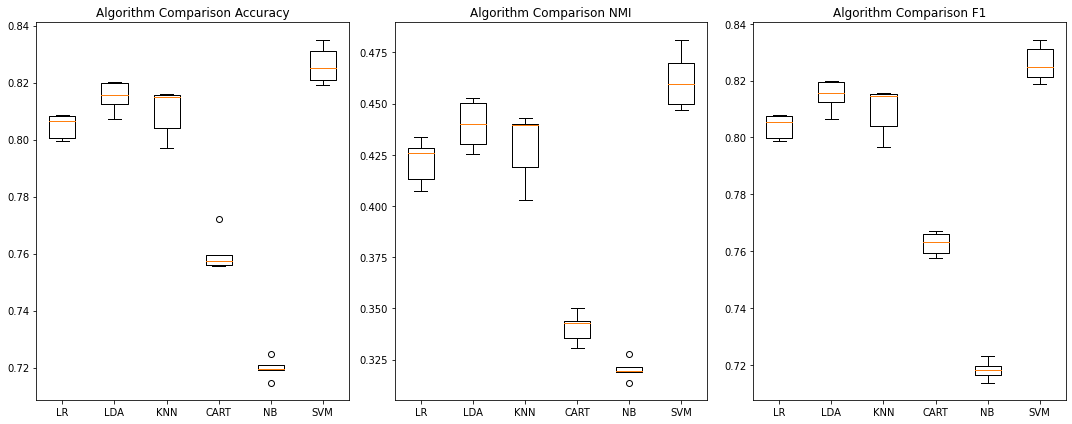

In [ ]:
results_Spot_Check_Algorithms = Spot_Check_Algorithms(X_train , Y_train)

Accuracy :  AB: 0.766500 (0.011158)
nmi :  AB: 0.351416 (0.018068)
f1_score :  AB: 0.766247 (0.011111)
############################################################
Accuracy :  LGBM: 0.829836 (0.005179)
nmi :  LGBM: 0.468873 (0.011561)
f1_score :  LGBM: 0.829563 (0.005048)
############################################################
Accuracy :  RF: 0.816966 (0.006343)
nmi :  RF: 0.444222 (0.016282)
f1_score :  RF: 0.814872 (0.007001)
############################################################
Accuracy :  ET: 0.817980 (0.005831)
nmi :  ET: 0.447904 (0.012927)
f1_score :  ET: 0.816682 (0.006257)
############################################################
Accuracy :  XGB: 0.826159 (0.010275)
nmi :  XGB: 0.462301 (0.022495)
f1_score :  XGB: 0.825877 (0.010273)
############################################################


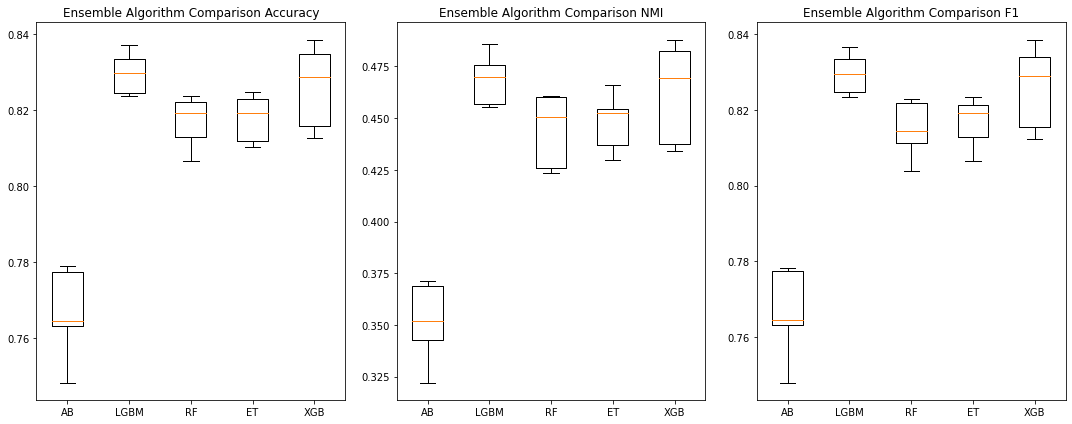

In [ ]:
results_ensembles = ensembles_methods(X_train , Y_train)

In [ ]:
frames = [results_Spot_Check_Algorithms, results_ensembles]

final_results = pd.concat(frames)
final_results

,Accuracy,NMI,F1_score
LR,0.804729,0.421738,0.803907
LDA,0.815191,0.439745,0.814784
KNN,0.809611,0.428929,0.809223
CART,0.760097,0.340607,0.762596
NB,0.719838,0.320138,0.718168
SVM,0.826286,0.461471,0.826033
AB,0.766500,0.351416,0.766247
LGBM,0.829836,0.468873,0.829563
RF,0.816966,0.444222,0.814872
ET,0.817980,0.447904,0.816682


In [ ]:
best_score , best_params = tune_SVM(X_train , Y_train)

Best: 0.826666 using {'C': 0.7937005259840997, 'kernel': 'rbf'}
0.748113 (0.007848) with: {'C': 0.125, 'kernel': 'linear'}
0.807266 (0.007146) with: {'C': 0.125, 'kernel': 'rbf'}
0.776072 (0.006624) with: {'C': 0.2314686780718226, 'kernel': 'linear'}
0.819122 (0.005386) with: {'C': 0.2314686780718226, 'kernel': 'rbf'}
0.794078 (0.002954) with: {'C': 0.4286219914265364, 'kernel': 'linear'}
0.824890 (0.006432) with: {'C': 0.4286219914265364, 'kernel': 'rbf'}
0.806124 (0.003150) with: {'C': 0.7937005259840997, 'kernel': 'linear'}
0.826666 (0.004610) with: {'C': 0.7937005259840997, 'kernel': 'rbf'}
0.813796 (0.005112) with: {'C': 1.4697344922755986, 'kernel': 'linear'}
0.826476 (0.006531) with: {'C': 1.4697344922755986, 'kernel': 'rbf'}
0.817409 (0.006547) with: {'C': 2.7215800003487542, 'kernel': 'linear'}
0.822292 (0.006761) with: {'C': 2.7215800003487542, 'kernel': 'rbf'}
0.818487 (0.005675) with: {'C': 5.039684199579492, 'kernel': 'linear'}
0.819882 (0.006265) with: {'C': 5.03968419957

In [ ]:
best_score

0.8266657890214626

##############################################################
Accuracy = 	 0.8351926977687627
##############################################################
              precision    recall  f1-score   support

           1       0.76      0.81      0.78       819
           2       0.85      0.87      0.86      1514
           3       0.87      0.81      0.84      1611

    accuracy                           0.84      3944
   macro avg       0.82      0.83      0.83      3944
weighted avg       0.84      0.84      0.84      3944

##############################################################


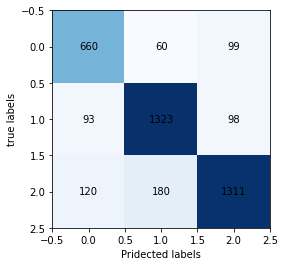

In [ ]:
Finalize_SVM_Model(X_train , Y_train , X_test , Y_test , best_params['kernel'] , best_params['C'])

## 3. Discuter d’autres idées pour combiner et aligner les deux types d’information.

### CiteSeer

In [ ]:
X = citeseer['fea']
n = X.shape[0] # le nombre d’individus
d = X.shape[1] # le nombre de variable
y = citeseer['gnd']
W = citeseer['W']

In [ ]:
print('X (fea) shape: \t' , X.shape)
print('W (W) shape: \t' , W.shape)
print('y (gnd) shape: \t' , y.shape)

X (fea) shape: 	 (3327, 3703)
W (W) shape: 	 (3327, 3327)
y (gnd) shape: 	 (3327, 1)


#### Methode 1


In [ ]:
def aug_normalized_adjacency(adj):
   adj = adj + sp.eye(adj.shape[0])
   adj = sp.coo_matrix(adj)
   row_sum = np.array(adj.sum(1))
   d_inv_sqrt = np.power(row_sum, -0.5).flatten()
   d_inv_sqrt[np.isinf(d_inv_sqrt)] = 0.
   d_mat_inv_sqrt = sp.diags(d_inv_sqrt)
   return d_mat_inv_sqrt.dot(adj).dot(d_mat_inv_sqrt).tocoo()

def abs_rw_normalized_adjacency(adj): 
   adj = adj + sp.eye(adj.shape[0])
   adj = sp.coo_matrix(adj)
   row_sum = np.array(adj.sum(1))
   d_inv = np.power(row_sum, -1).flatten()
   d_inv[np.isinf(d_inv)] = 0.
   d_mat_inv = sp.diags(d_inv)
   return np.abs(d_mat_inv.dot(adj).tocoo())

def rw_normalized_adjacency(adj): 
   adj = adj + sp.eye(adj.shape[0])
   adj = sp.coo_matrix(adj)
   row_sum = np.array(adj.sum(1))
   d_inv = np.power(row_sum, -1).flatten()
   d_inv[np.isinf(d_inv)] = 0.
   d_mat_inv = sp.diags(d_inv)
   return d_mat_inv.dot(adj).tocoo()

def sym_normalized_laplacian(adj): 
   adj = sp.coo_matrix(adj)
   row_sum = np.array(adj.sum(1))
   d_mat = sp.diags(row_sum.flatten())
   L = d_mat - adj
   d_inv = np.power(row_sum, -1/2).flatten()
   d_inv[np.isinf(d_inv)] = 0.
   d_mat_inv = sp.diags(d_inv)
   return d_mat_inv.dot(L).dot(d_mat_inv).tocoo()

def inv_normalized_laplacian(adj, alpha=0.8):
   adj = sp.coo_matrix(adj)
   row_sum = np.array(adj.sum(1))
   d_mat = sp.diags(row_sum.flatten())
   L = d_mat - adj
   d_inv = np.power(row_sum, -0.5).flatten()
   d_inv[np.isinf(d_inv)] = 0.
   d_mat_inv = sp.diags(d_inv)
   term = alpha * (sp.eye(adj.shape[0]) - d_mat_inv.dot(L).dot(d_mat_inv).tocoo())
   return term.dot(term)

def comb_laplacian(adj, scale=False):
   row_sum = np.array(adj.sum(1))
   d = sp.diags(row_sum.flatten())
   L = (d - adj).todense()
   if scale:
      max_eigval = np.max(np.linalg.eigvals(L))
      L = L / max_eigval
   L = sp.coo_matrix(L)
   return L

In [ ]:
def fetch_normalization(type, **kwargs):
   switcher = {
       'AugNormAdj': aug_normalized_adjacency, 
       'RwNorm': rw_normalized_adjacency,
       'InvLap': lambda adj: inv_normalized_laplacian(adj, **kwargs),
       'CombLap': comb_laplacian,
       'SymNormLap': sym_normalized_laplacian,
       'AbsRwNormAdj': abs_rw_normalized_adjacency
   }
   func = switcher.get(type, lambda x: x)
   return func

In [ ]:
def row_normalize(mx):
    """Row-normalize sparse matrix"""
    rowsum = np.array(mx.sum(1))
    r_inv = np.power(rowsum, -1).flatten()
    r_inv[np.isinf(r_inv)] = 0.
    r_mat_inv = sp.diags(r_inv)
    mx = r_mat_inv.dot(mx)
    return mx

In [ ]:
def preprocess_data(adj, features, normalization, extra=None):
    
    adj_normalizer = fetch_normalization(normalization) #extra
    adj = adj_normalizer(adj)
    #row_sum = 1 / (np.sqrt(np.array(adj.sum(1))))
    #row_sum = np.array(adj.sum(1))
    #features = row_sum
    #features = features.todense()
    #features = np.concatenate([features, row_sum], axis=1) 
    #features = sp.lil_matrix(features)
    if normalization != "":
        features = row_normalize(features)
    return adj, features

In [ ]:
W, X = preprocess_data(W, X, normalization = 'AugNormAdj', extra = 0.6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


In [ ]:
W

<3327x3327 sparse matrix of type '<class 'numpy.float64'>'
	with 12431 stored elements in COOrdinate format>

In [ ]:
def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    """Convert a scipy sparse matrix to a torch sparse tensor."""
    sparse_mx = sparse_mx.tocoo().astype(np.float32)
    indices = torch.from_numpy(
        np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64))
    values = torch.from_numpy(sparse_mx.data)
    shape = torch.Size(sparse_mx.shape)
    return torch.sparse.FloatTensor(indices, values, shape)

In [ ]:
# porting to pytorch
X = torch.FloatTensor(np.array(X)).float()
W = sparse_mx_to_torch_sparse_tensor(W).float()

In [ ]:
def sgc_precompute(features, adj, degree):
    for i in range(degree):
        features = torch.spmm(adj, features)
    return features

In [ ]:
feature = sgc_precompute(X, W, 2)

In [ ]:
feature_array = feature.cpu().detach().numpy()

In [ ]:
feature

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0021, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])

In [ ]:
feature_array

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00207255, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [ ]:
feature_array_df = pd.DataFrame(data = feature_array)
feature_array_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3663,3664,3665,3666,3667,3668,3669,3670,3671,3672,3673,3674,3675,3676,3677,3678,3679,3680,3681,3682,3683,3684,3685,3686,3687,3688,3689,3690,3691,3692,3693,3694,3695,3696,3697,3698,3699,3700,3701,3702
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.002073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00039,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.001121,0.0,0.001561,0.000000,0.0,0.000625,0.000319,0.0,0.0,0.000378,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.001670,0.0,0.0,0.000298,0.0,0.0,0.00037,0.000199,0.0,0.0,0.0,0.0,0.000319,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000199,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.015625,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.015625,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.009561,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.006944,0.0,0.0,0.000000,0.0,0.0,0.004953,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.018519,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.013889,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3322,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.015625,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.034144,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3323,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.015625,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.034144,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3324,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.001940,0.00000,0.0,0.000000,0.015307,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.

In [ ]:
np.unique(y) # On a 6 classes

array([1, 2, 3, 4, 5, 6], dtype=uint8)

In [ ]:
# Prepare Data

# Split-out validation dataset

validation_size = 0.20
seed_split = 7
X_train, X_test, Y_train, Y_test = train_test_split(feature_array, y, test_size=validation_size, random_state=seed_split)


Accuracy :  LR: 0.594925 (0.052389)
nmi :  LR: 0.357742 (0.045249)
f1_score :  LR: 0.535665 (0.065538)
############################################################
Accuracy :  LDA: 0.377676 (0.048659)
nmi :  LDA: 0.131021 (0.025062)
f1_score :  LDA: 0.396740 (0.062845)
############################################################
Accuracy :  KNN: 0.624955 (0.025043)
nmi :  KNN: 0.381691 (0.021068)
f1_score :  KNN: 0.619965 (0.021995)
############################################################
Accuracy :  CART: 0.662914 (0.016979)
nmi :  CART: 0.363532 (0.019760)
f1_score :  CART: 0.653726 (0.016186)
############################################################
Accuracy :  NB: 0.714021 (0.014002)
nmi :  NB: 0.446621 (0.021192)
f1_score :  NB: 0.712014 (0.013333)
############################################################
Accuracy :  SVM: 0.764380 (0.022391)
nmi :  SVM: 0.516834 (0.034153)
f1_score :  SVM: 0.757242 (0.022707)
############################################################


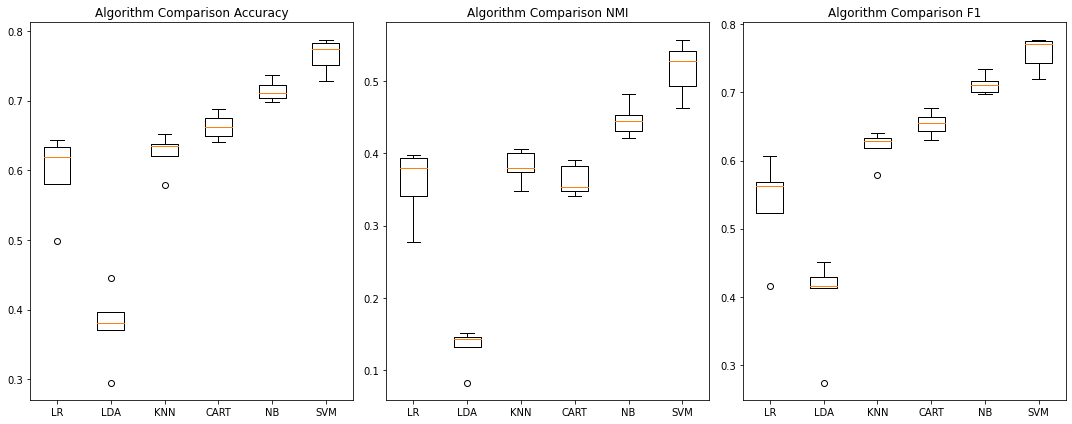

In [ ]:
results_Spot_Check_Algorithms = Spot_Check_Algorithms(X_train , Y_train)

Accuracy :  AB: 0.626836 (0.015436)
nmi :  AB: 0.341492 (0.012483)
f1_score :  AB: 0.620934 (0.013832)
############################################################
Accuracy :  LGBM: 0.751976 (0.013384)
nmi :  LGBM: 0.494951 (0.020422)
f1_score :  LGBM: 0.746721 (0.012804)
############################################################
Accuracy :  RF: 0.753479 (0.009070)
nmi :  RF: 0.503709 (0.014289)
f1_score :  RF: 0.745572 (0.010460)
############################################################
Accuracy :  ET: 0.757613 (0.005827)
nmi :  ET: 0.495670 (0.019402)
f1_score :  ET: 0.751898 (0.009592)
############################################################
Accuracy :  XGB: 0.748591 (0.018355)
nmi :  XGB: 0.490748 (0.023162)
f1_score :  XGB: 0.744639 (0.017790)
############################################################


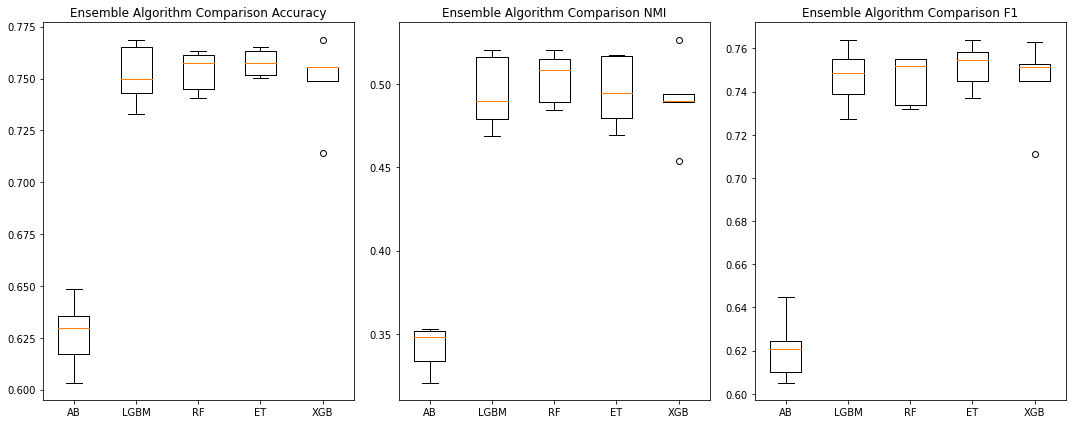

In [ ]:
results_ensembles = ensembles_methods(X_train , Y_train)

In [ ]:
frames = [results_Spot_Check_Algorithms, results_ensembles]

final_results = pd.concat(frames)
final_results

,Accuracy,NMI,F1_score
LR,0.594925,0.357742,0.535665
LDA,0.377676,0.131021,0.396740
KNN,0.624955,0.381691,0.619965
CART,0.662914,0.363532,0.653726
NB,0.714021,0.446621,0.712014
SVM,0.764380,0.516834,0.757242
AB,0.626836,0.341492,0.620934
LGBM,0.751976,0.494951,0.746721
RF,0.753479,0.503709,0.745572
ET,0.757613,0.495670,0.751898


In [ ]:
best_score , best_params = tune_SVM(X_train , Y_train)

Best: 0.763250 using {'C': 1.4697344922755986, 'kernel': 'rbf'}
0.226619 (0.044877) with: {'C': 0.125, 'kernel': 'linear'}
0.676458 (0.028298) with: {'C': 0.125, 'kernel': 'rbf'}
0.226619 (0.044877) with: {'C': 0.2314686780718226, 'kernel': 'linear'}
0.730183 (0.017510) with: {'C': 0.2314686780718226, 'kernel': 'rbf'}
0.226619 (0.044877) with: {'C': 0.4286219914265364, 'kernel': 'linear'}
0.755360 (0.011988) with: {'C': 0.4286219914265364, 'kernel': 'rbf'}
0.226619 (0.044877) with: {'C': 0.7937005259840997, 'kernel': 'linear'}
0.762125 (0.019911) with: {'C': 0.7937005259840997, 'kernel': 'rbf'}
0.294259 (0.036250) with: {'C': 1.4697344922755986, 'kernel': 'linear'}
0.763250 (0.019272) with: {'C': 1.4697344922755986, 'kernel': 'rbf'}
0.641136 (0.033891) with: {'C': 2.7215800003487542, 'kernel': 'linear'}
0.756483 (0.017843) with: {'C': 2.7215800003487542, 'kernel': 'rbf'}
0.736573 (0.015320) with: {'C': 5.039684199579492, 'kernel': 'linear'}
0.744831 (0.018726) with: {'C': 5.03968419957

In [ ]:
best_score

0.76325029271114

##############################################################
Accuracy = 	 0.7762762762762763
##############################################################
              precision    recall  f1-score   support

           1       0.47      0.34      0.40        50
           2       0.73      0.71      0.72       113
           3       0.72      0.79      0.75       126
           4       0.84      0.83      0.84       150
           5       0.83      0.86      0.84       129
           6       0.85      0.86      0.85        98

    accuracy                           0.78       666
   macro avg       0.74      0.73      0.73       666
weighted avg       0.77      0.78      0.77       666

##############################################################


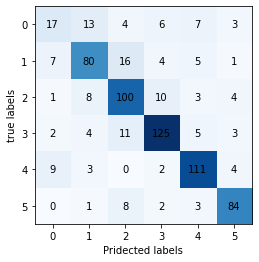

In [ ]:
Finalize_SVM_Model(X_train , Y_train , X_test , Y_test , best_params['kernel'] , best_params['C'])

#### Methode 2

In [ ]:
X = citeseer['fea']
n = X.shape[0] # le nombre d’individus
d = X.shape[1] # le nombre de variable
y = citeseer['gnd']
W = citeseer['W']

##### x_markov

In [ ]:
def create_degree_matrix(X):
    return np.diag(np.sum(X, axis=1))

In [ ]:
#See "Incorporating network structure with node contents for community detection on large networks using deep learning" (Cao et al., 2018)
def markov_matrix(A, S):
    D = create_degree_matrix(A)
    return np.matmul(np.linalg.inv(D), S).astype('float32')

In [ ]:
X_markov = markov_matrix(W , X ).astype('float32')

In [ ]:
X_markov

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Prepare Data

# Split-out validation dataset

validation_size = 0.20
seed_split = 7
X_train, X_test, Y_train, Y_test = train_test_split(X_markov, y, test_size=validation_size, random_state=seed_split)


Accuracy :  LR: 0.703869 (0.011471)
nmi :  LR: 0.425479 (0.012133)
f1_score :  LR: 0.695260 (0.012320)
############################################################
Accuracy :  LDA: 0.261189 (0.047167)
nmi :  LDA: 0.052966 (0.012240)
f1_score :  LDA: 0.253007 (0.055254)
############################################################
Accuracy :  KNN: 0.421274 (0.006016)
nmi :  KNN: 0.174312 (0.009254)
f1_score :  KNN: 0.432846 (0.005847)
############################################################
Accuracy :  CART: 0.585125 (0.015594)
nmi :  CART: 0.264938 (0.009985)
f1_score :  CART: 0.589551 (0.010981)
############################################################
Accuracy :  NB: 0.598269 (0.022449)
nmi :  NB: 0.281210 (0.030522)
f1_score :  NB: 0.594233 (0.022871)
############################################################
Accuracy :  SVM: 0.656516 (0.026513)
nmi :  SVM: 0.377895 (0.027064)
f1_score :  SVM: 0.635861 (0.025620)
############################################################


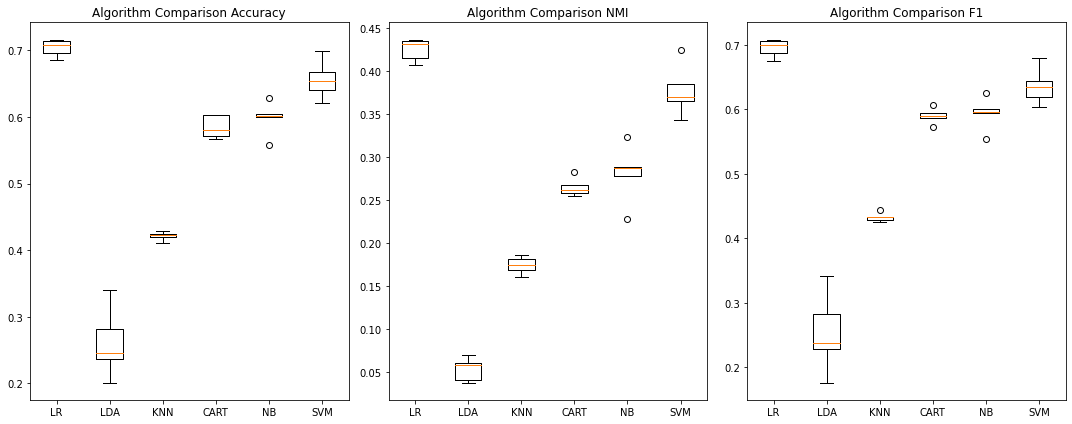

In [ ]:
results_Spot_Check_Algorithms = Spot_Check_Algorithms(X_train , Y_train)

Accuracy :  AB: 0.590388 (0.018104)
nmi :  AB: 0.299577 (0.019231)
f1_score :  AB: 0.586440 (0.016142)
############################################################
Accuracy :  LGBM: 0.703125 (0.011742)
nmi :  LGBM: 0.423835 (0.017380)
f1_score :  LGBM: 0.697572 (0.011380)
############################################################
Accuracy :  RF: 0.709508 (0.008615)
nmi :  RF: 0.440547 (0.015768)
f1_score :  RF: 0.699559 (0.010486)
############################################################
Accuracy :  ET: 0.728300 (0.011750)
nmi :  ET: 0.458268 (0.024644)
f1_score :  ET: 0.713966 (0.013113)
############################################################
Accuracy :  XGB: 0.698607 (0.011129)
nmi :  XGB: 0.418169 (0.019936)
f1_score :  XGB: 0.691648 (0.010698)
############################################################


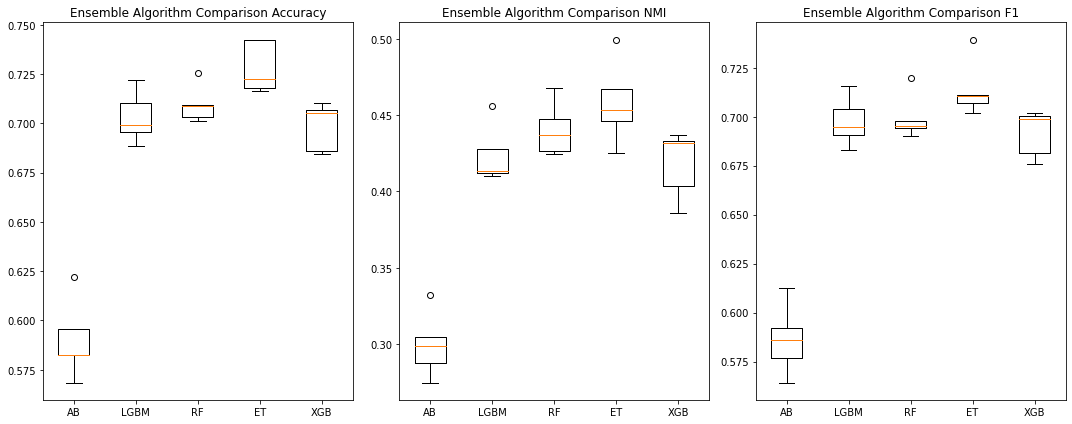

In [ ]:
results_ensembles = ensembles_methods(X_train , Y_train)

In [ ]:
frames = [results_Spot_Check_Algorithms, results_ensembles]

final_results = pd.concat(frames)
final_results

,Accuracy,NMI,F1_score
LR,0.703869,0.425479,0.695260
LDA,0.261189,0.052966,0.253007
KNN,0.421274,0.174312,0.432846
CART,0.585125,0.264938,0.589551
NB,0.598269,0.281210,0.594233
SVM,0.656516,0.377895,0.635861
AB,0.590388,0.299577,0.586440
LGBM,0.703125,0.423835,0.697572
RF,0.709508,0.440547,0.699559
ET,0.728300,0.458268,0.713966


In [ ]:
best_score , best_params = tune_SVM(X_train , Y_train)

Best: 0.689585 using {'C': 17.280955822276894, 'kernel': 'rbf'}
0.645238 (0.026770) with: {'C': 0.125, 'kernel': 'linear'}
0.294630 (0.021425) with: {'C': 0.125, 'kernel': 'rbf'}
0.666284 (0.024412) with: {'C': 0.2314686780718226, 'kernel': 'linear'}
0.391223 (0.042325) with: {'C': 0.2314686780718226, 'kernel': 'rbf'}
0.675304 (0.020075) with: {'C': 0.4286219914265364, 'kernel': 'linear'}
0.532134 (0.036810) with: {'C': 0.4286219914265364, 'kernel': 'rbf'}
0.671173 (0.016371) with: {'C': 0.7937005259840997, 'kernel': 'linear'}
0.630213 (0.026955) with: {'C': 0.7937005259840997, 'kernel': 'rbf'}
0.671917 (0.023755) with: {'C': 1.4697344922755986, 'kernel': 'linear'}
0.670796 (0.024201) with: {'C': 1.4697344922755986, 'kernel': 'rbf'}
0.660265 (0.027028) with: {'C': 2.7215800003487542, 'kernel': 'linear'}
0.685452 (0.015526) with: {'C': 2.7215800003487542, 'kernel': 'rbf'}
0.657263 (0.016951) with: {'C': 5.039684199579492, 'kernel': 'linear'}
0.689210 (0.016624) with: {'C': 5.03968419957

In [ ]:
best_score

0.6895851260421221

##############################################################
Accuracy = 	 0.6906906906906907
##############################################################
              precision    recall  f1-score   support

           1       0.48      0.28      0.35        50
           2       0.62      0.71      0.66       113
           3       0.63      0.70      0.66       126
           4       0.76      0.73      0.75       150
           5       0.82      0.77      0.80       129
           6       0.66      0.70      0.68        98

    accuracy                           0.69       666
   macro avg       0.66      0.65      0.65       666
weighted avg       0.69      0.69      0.69       666

##############################################################


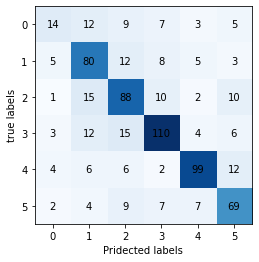

In [ ]:
Finalize_SVM_Model(X_train , Y_train , X_test , Y_test , best_params['kernel'] , best_params['C'])

In [ ]:
best_score , best_params = tune_ExtraTrees(X_train , Y_train)

Best: 0.669302 using {'max_depth': 20, 'max_features': 20, 'min_samples_split': 7, 'n_estimators': 150}
0.277726 (0.022124) with: {'max_depth': 4, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 20}
0.273209 (0.018939) with: {'max_depth': 4, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 50}
0.288250 (0.034865) with: {'max_depth': 4, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 100}
0.302530 (0.039512) with: {'max_depth': 4, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 150}
0.303659 (0.040969) with: {'max_depth': 4, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 200}
0.267589 (0.049844) with: {'max_depth': 4, 'max_features': 4, 'min_samples_split': 4, 'n_estimators': 20}
0.281862 (0.034326) with: {'max_depth': 4, 'max_features': 4, 'min_samples_split': 4, 'n_estimators': 50}
0.287485 (0.038591) with: {'max_depth': 4, 'max_features': 4, 'min_samples_split': 4, 'n_estimators': 100}
0.300274 (0.042772) with: {'max_depth': 4, '

In [ ]:
best_score

0.6693020073636248

In [ ]:
best_params

{'max_depth': 20,
 'max_features': 20,
 'min_samples_split': 7,
 'n_estimators': 150}

##############################################################
Accuracy = 	 0.6696696696696697
##############################################################
              precision    recall  f1-score   support

           1       1.00      0.04      0.08        50
           2       0.68      0.61      0.64       113
           3       0.50      0.78      0.61       126
           4       0.69      0.82      0.75       150
           5       0.82      0.75      0.78       129
           6       0.84      0.58      0.69        98

    accuracy                           0.67       666
   macro avg       0.75      0.60      0.59       666
weighted avg       0.72      0.67      0.65       666

##############################################################


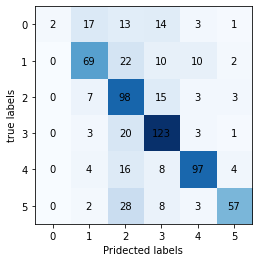

In [ ]:
Finalize_ExtraTrees_Model(X_train , Y_train , X_test , Y_test , best_params['max_depth'] , best_params['max_features'], best_params['min_samples_split'], best_params['n_estimators'])

### Cora

In [ ]:
X = cora['fea']
y = cora['gnd']
W = cora['W']

In [ ]:
print('X (fea) shape: \t' , X.shape)
print('W (W) shape: \t' , W.shape)
print('y (gnd) shape: \t' , y.shape)

X (fea) shape: 	 (2708, 1433)
W (W) shape: 	 (2708, 2708)
y (gnd) shape: 	 (2708, 1)


#### Methode 1


In [ ]:
W, X = preprocess_data(W, X, normalization = 'AugNormAdj', extra = 0.6)

In [ ]:
W

<2708x2708 sparse matrix of type '<class 'numpy.float64'>'
	with 13264 stored elements in COOrdinate format>

In [ ]:
# porting to pytorch
X = torch.FloatTensor(np.array(X)).float()
W = sparse_mx_to_torch_sparse_tensor(W).float()

In [ ]:
feature = sgc_precompute(X, W, 2)

In [ ]:
feature_array = feature.cpu().detach().numpy()

In [ ]:
feature

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 1.0435e-02,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 7.7981e-05, 4.1791e-04,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [4.2189e-04, 1.6582e-04, 6.6434e-04,  ..., 0.0000e+00, 0.0000e+00,
         1.9377e-04]])

In [ ]:
feature_array

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0434984e-02, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 7.7980512e-05, 4.1790731e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.2189361e-04, 1.6582184e-04, 6.6434412e-04, ..., 0.0000000e+00,
        0.0000000e+00, 1.9376702e-04]], dtype=float32)

In [ ]:
feature_array_df = pd.DataFrame(data = feature_array)
feature_array_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.064049,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.003007,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.009211,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.004009,0.0,0.0,0.000000,0.0,0.010435,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.011529,0.000000,0.001969,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.043921,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.002806,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.001969,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.007321,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.007321,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.002806,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
2,0.000000,0.000078,0.000418,0.000000,0.003138,0.000802,0.003131,0.000000,0.0,0.0,0.0,0.000855,0.0,0.000162,0.0,0.0,0.0,0.0,0.000168,0.045731,0.0,0.0,0.0,0.00012,0.0,0.000000,0.000103,0.009313,0.000163,0.0,0.0,0.0,0.0,0.0,0.00000,0.001415,0.003380,0.0,0.000115,0.001275,...,0.000463,0.000162,0.000000,0.000325,0.002702,0.0,0.0,0.0,0.0,0.000000,0.0,0.000325,0.0,0.0,0.0,0.0,0.000090,0.0,0.0,0.000000,0.003825,0.000000,0.000325,0.000000,0.0,0.000119,0.0,0.0,0.0,0.000146,0.009285,0.000325,0.000140,0.000438,0.0,0.0,0.000466,0.0,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
4,0.000000,0.008816,0.000000,0.007845,0.000000,0.000000,0.000945,0.000000,0.0,0.0,0.0,0.000000,0.0,0.005292,0.0,0.0,0.0,0.0,0.000000,0.000937,0.0,0.0,0.0,0.00000,0.0,0.003411,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00261,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.001501,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,0.000000,0.000000,0.000000,0.000000,0.000000,0.021739,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.021739,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.021739,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
2704,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0

In [ ]:
np.unique(y) # On a 7 classes

array([1, 2, 3, 4, 5, 6, 7], dtype=uint8)

In [ ]:
# Prepare Data

# Split-out validation dataset

validation_size = 0.20
seed_split = 7
X_train, X_test, Y_train, Y_test = train_test_split(feature_array, y, test_size=validation_size, random_state=seed_split)


Accuracy :  LR: 0.346257 (0.036252)
nmi :  LR: 0.085620 (0.021440)
f1_score :  LR: 0.216279 (0.033820)
############################################################
Accuracy :  LDA: 0.581720 (0.009498)
nmi :  LDA: 0.294179 (0.003578)
f1_score :  LDA: 0.583530 (0.010123)
############################################################
Accuracy :  KNN: 0.847646 (0.012295)
nmi :  KNN: 0.672872 (0.022363)
f1_score :  KNN: 0.848664 (0.011771)
############################################################
Accuracy :  CART: 0.777474 (0.021851)
nmi :  CART: 0.557834 (0.040705)
f1_score :  CART: 0.785486 (0.018959)
############################################################
Accuracy :  NB: 0.814401 (0.016410)
nmi :  NB: 0.616238 (0.029523)
f1_score :  NB: 0.815733 (0.016483)
############################################################
Accuracy :  SVM: 0.870263 (0.014526)
nmi :  SVM: 0.712292 (0.025983)
f1_score :  SVM: 0.870628 (0.014414)
############################################################


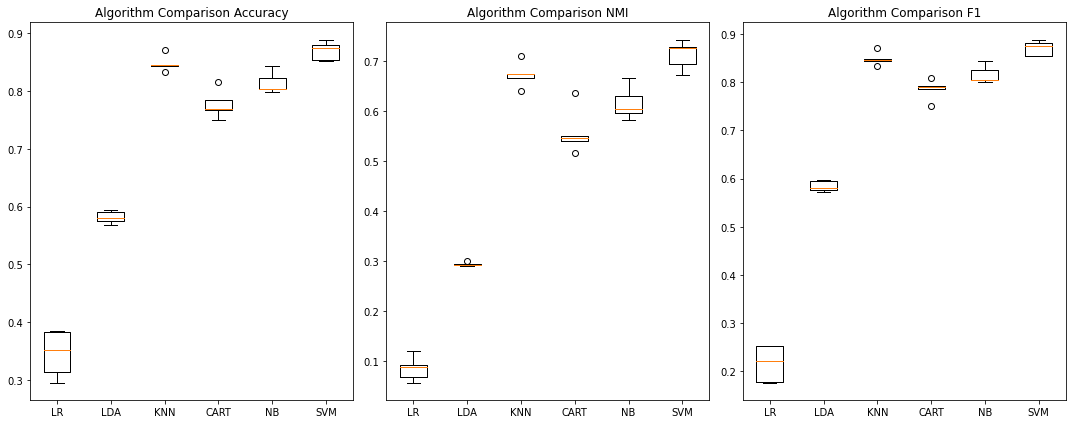

In [ ]:
results_Spot_Check_Algorithms = Spot_Check_Algorithms(X_train , Y_train)

Accuracy :  AB: 0.578000 (0.035041)
nmi :  AB: 0.436062 (0.054622)
f1_score :  AB: 0.518342 (0.045590)
############################################################
Accuracy :  LGBM: 0.866574 (0.014190)
nmi :  LGBM: 0.706213 (0.029782)
f1_score :  LGBM: 0.865715 (0.014135)
############################################################
Accuracy :  RF: 0.857797 (0.023562)
nmi :  RF: 0.696492 (0.044426)
f1_score :  RF: 0.854436 (0.027308)
############################################################
Accuracy :  ET: 0.866577 (0.020139)
nmi :  ET: 0.707053 (0.037259)
f1_score :  ET: 0.862923 (0.018669)
############################################################
Accuracy :  XGB: 0.860107 (0.016659)
nmi :  XGB: 0.697571 (0.033196)
f1_score :  XGB: 0.859654 (0.017005)
############################################################


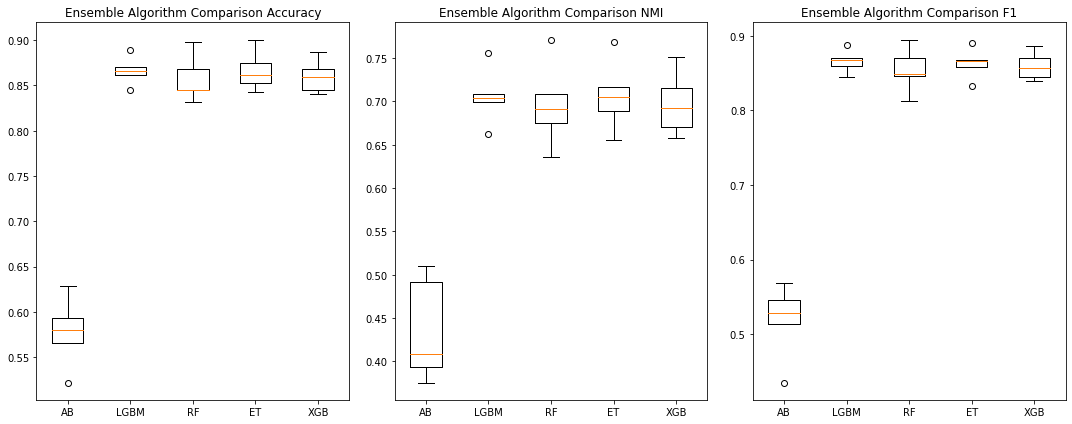

In [ ]:
results_ensembles = ensembles_methods(X_train , Y_train)

In [ ]:
frames = [results_Spot_Check_Algorithms, results_ensembles]

final_results = pd.concat(frames)
final_results

,Accuracy,NMI,F1_score
LR,0.346257,0.085620,0.216279
LDA,0.581720,0.294179,0.583530
KNN,0.847646,0.672872,0.848664
CART,0.777474,0.557834,0.785486
NB,0.814401,0.616238,0.815733
SVM,0.870263,0.712292,0.870628
AB,0.578000,0.436062,0.518342
LGBM,0.866574,0.706213,0.865715
RF,0.857797,0.696492,0.854436
ET,0.866577,0.707053,0.862923


In [ ]:
best_score , best_params = tune_SVM(X_train , Y_train)

Best: 0.875344 using {'C': 32.0, 'kernel': 'linear'}
0.302860 (0.029524) with: {'C': 0.125, 'kernel': 'linear'}
0.741450 (0.025839) with: {'C': 0.125, 'kernel': 'rbf'}
0.302860 (0.029524) with: {'C': 0.2314686780718226, 'kernel': 'linear'}
0.818553 (0.010788) with: {'C': 0.2314686780718226, 'kernel': 'rbf'}
0.303322 (0.030071) with: {'C': 0.4286219914265364, 'kernel': 'linear'}
0.855030 (0.012191) with: {'C': 0.4286219914265364, 'kernel': 'rbf'}
0.306092 (0.032592) with: {'C': 0.7937005259840997, 'kernel': 'linear'}
0.868880 (0.014806) with: {'C': 0.7937005259840997, 'kernel': 'rbf'}
0.363343 (0.032027) with: {'C': 1.4697344922755986, 'kernel': 'linear'}
0.870722 (0.018751) with: {'C': 1.4697344922755986, 'kernel': 'rbf'}
0.546619 (0.028123) with: {'C': 2.7215800003487542, 'kernel': 'linear'}
0.870266 (0.015971) with: {'C': 2.7215800003487542, 'kernel': 'rbf'}
0.746528 (0.017373) with: {'C': 5.039684199579492, 'kernel': 'linear'}
0.865649 (0.019139) with: {'C': 5.039684199579492, 'kern

In [ ]:
best_score

0.8753440257127958

##############################################################
Accuracy = 	 0.8892988929889298
##############################################################
              precision    recall  f1-score   support

           1       0.76      0.90      0.82        79
           2       0.90      0.93      0.92        29
           3       0.97      0.96      0.96        94
           4       0.88      0.90      0.89       162
           5       0.96      0.83      0.89        84
           6       0.87      0.81      0.84        57
           7       0.94      0.89      0.92        37

    accuracy                           0.89       542
   macro avg       0.90      0.89      0.89       542
weighted avg       0.89      0.89      0.89       542

##############################################################


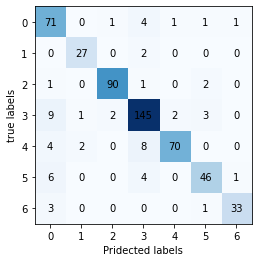

In [ ]:
Finalize_SVM_Model(X_train , Y_train , X_test , Y_test , best_params['kernel'] , best_params['C'])

#### Methode 2

In [ ]:
X = cora['fea']
y = cora['gnd']
W = cora['W']

##### x_markov

In [ ]:
X_markov = markov_matrix(W , X ).astype('float32')

In [ ]:
X_markov

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Prepare Data

# Split-out validation dataset

validation_size = 0.20
seed_split = 7
X_train, X_test, Y_train, Y_test = train_test_split(X_markov, y, test_size=validation_size, random_state=seed_split)


Accuracy :  LR: 0.732675 (0.020082)
nmi :  LR: 0.490234 (0.029583)
f1_score :  LR: 0.728513 (0.020514)
############################################################
Accuracy :  LDA: 0.368872 (0.018212)
nmi :  LDA: 0.110630 (0.008091)
f1_score :  LDA: 0.373675 (0.016049)
############################################################
Accuracy :  KNN: 0.482458 (0.010986)
nmi :  KNN: 0.209586 (0.013829)
f1_score :  KNN: 0.482469 (0.012644)
############################################################
Accuracy :  CART: 0.639870 (0.028125)
nmi :  CART: 0.348276 (0.035506)
f1_score :  CART: 0.637627 (0.028562)
############################################################
Accuracy :  NB: 0.513387 (0.030214)
nmi :  NB: 0.217280 (0.024373)
f1_score :  NB: 0.507518 (0.031447)
############################################################
Accuracy :  SVM: 0.614022 (0.019532)
nmi :  SVM: 0.390570 (0.022438)
f1_score :  SVM: 0.601247 (0.020285)
############################################################


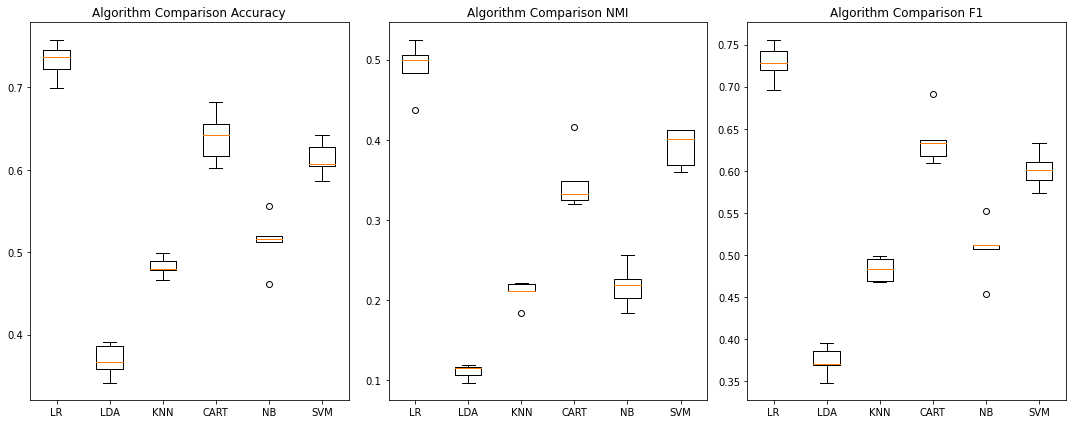

In [ ]:
results_Spot_Check_Algorithms = Spot_Check_Algorithms(X_train , Y_train)

Accuracy :  AB: 0.491675 (0.035712)
nmi :  AB: 0.292996 (0.026730)
f1_score :  AB: 0.497285 (0.036684)
############################################################
Accuracy :  LGBM: 0.739143 (0.022091)
nmi :  LGBM: 0.489318 (0.027718)
f1_score :  LGBM: 0.735204 (0.022040)
############################################################
Accuracy :  RF: 0.746066 (0.016468)
nmi :  RF: 0.507322 (0.017775)
f1_score :  RF: 0.741021 (0.014727)
############################################################
Accuracy :  ET: 0.759914 (0.019887)
nmi :  ET: 0.533204 (0.016357)
f1_score :  ET: 0.756313 (0.012548)
############################################################
Accuracy :  XGB: 0.749298 (0.019078)
nmi :  XGB: 0.510740 (0.025327)
f1_score :  XGB: 0.745905 (0.019216)
############################################################


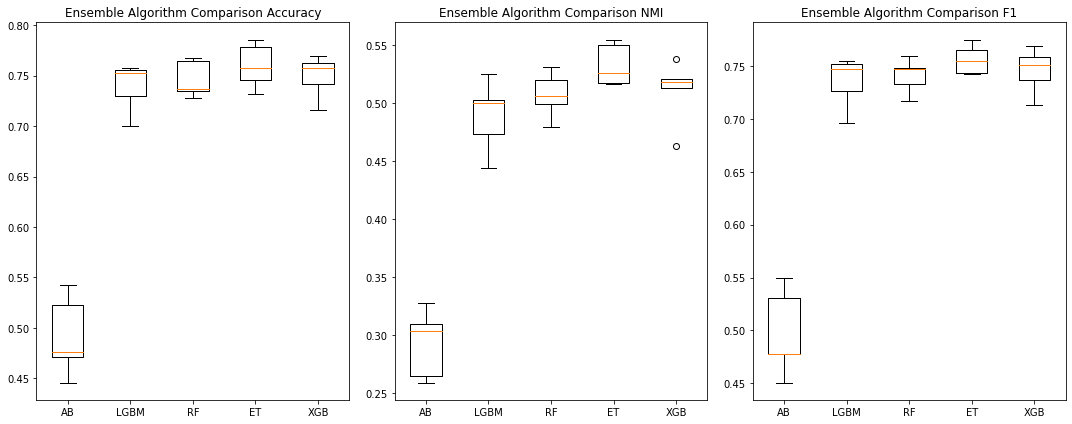

In [ ]:
results_ensembles = ensembles_methods(X_train , Y_train)

In [ ]:
frames = [results_Spot_Check_Algorithms, results_ensembles]

final_results = pd.concat(frames)
final_results

,Accuracy,NMI,F1_score
LR,0.732675,0.490234,0.728513
LDA,0.368872,0.110630,0.373675
KNN,0.482458,0.209586,0.482469
CART,0.639870,0.348276,0.637627
NB,0.513387,0.217280,0.507518
SVM,0.614022,0.390570,0.601247
AB,0.491675,0.292996,0.497285
LGBM,0.739143,0.489318,0.735204
RF,0.746066,0.507322,0.741021
ET,0.759914,0.533204,0.756313


In [ ]:
best_score , best_params = tune_SVM(X_train , Y_train)

Best: 0.716064 using {'C': 2.7215800003487542, 'kernel': 'linear'}
0.537843 (0.038009) with: {'C': 0.125, 'kernel': 'linear'}
0.303322 (0.029928) with: {'C': 0.125, 'kernel': 'rbf'}
0.620031 (0.021992) with: {'C': 0.2314686780718226, 'kernel': 'linear'}
0.346257 (0.033658) with: {'C': 0.2314686780718226, 'kernel': 'rbf'}
0.664350 (0.016265) with: {'C': 0.4286219914265364, 'kernel': 'linear'}
0.452441 (0.030995) with: {'C': 0.4286219914265364, 'kernel': 'rbf'}
0.685592 (0.017247) with: {'C': 0.7937005259840997, 'kernel': 'linear'}
0.582162 (0.024664) with: {'C': 0.7937005259840997, 'kernel': 'rbf'}
0.704524 (0.012820) with: {'C': 1.4697344922755986, 'kernel': 'linear'}
0.643570 (0.014040) with: {'C': 1.4697344922755986, 'kernel': 'rbf'}
0.716064 (0.012866) with: {'C': 2.7215800003487542, 'kernel': 'linear'}
0.677741 (0.008563) with: {'C': 2.7215800003487542, 'kernel': 'rbf'}
0.699446 (0.016621) with: {'C': 5.039684199579492, 'kernel': 'linear'}
0.685592 (0.005918) with: {'C': 5.03968419

In [ ]:
best_score

0.7160641117059205

##############################################################
Accuracy = 	 0.7361623616236163
##############################################################
              precision    recall  f1-score   support

           1       0.58      0.62      0.60        79
           2       0.50      0.72      0.59        29
           3       0.91      0.88      0.90        94
           4       0.77      0.76      0.77       162
           5       0.79      0.73      0.76        84
           6       0.84      0.67      0.75        57
           7       0.55      0.65      0.59        37

    accuracy                           0.74       542
   macro avg       0.71      0.72      0.71       542
weighted avg       0.75      0.74      0.74       542

##############################################################


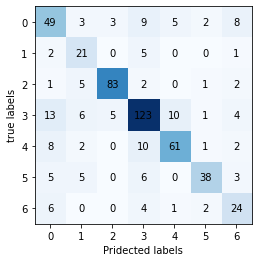

In [ ]:
Finalize_SVM_Model(X_train , Y_train , X_test , Y_test , best_params['kernel'] , best_params['C'])

##############################################################
Accuracy = 	 0.7601476014760148
##############################################################
              precision    recall  f1-score   support

           1       0.61      0.54      0.57        79
           2       0.86      0.86      0.86        29
           3       0.89      0.87      0.88        94
           4       0.73      0.84      0.78       162
           5       0.79      0.76      0.78        84
           6       0.73      0.70      0.71        57
           7       0.81      0.59      0.69        37

    accuracy                           0.76       542
   macro avg       0.77      0.74      0.75       542
weighted avg       0.76      0.76      0.76       542

##############################################################


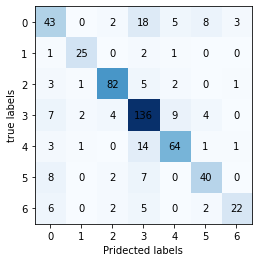

In [ ]:
Finalize_ExtraTrees_Model(X_train , Y_train , X_test , Y_test)

### Pumbed

In [ ]:
X = pubmed['fea']
y = pubmed['gnd']
W = pubmed['W']

In [ ]:
print('X (fea) shape: \t' , X.shape)
print('W (W) shape: \t' , W.shape)
print('y (gnd) shape: \t' , y.shape)

X (fea) shape: 	 (19717, 500)
W (W) shape: 	 (19717, 19717)
y (gnd) shape: 	 (19717, 1)


#### Methode 1


In [ ]:
W, X = preprocess_data(W, X, normalization = 'AugNormAdj', extra = 0.6)

In [ ]:
W

<19717x19717 sparse matrix of type '<class 'numpy.float64'>'
	with 108365 stored elements in COOrdinate format>

In [ ]:
# porting to pytorch
X = torch.FloatTensor(np.array(X)).float()
W = sparse_mx_to_torch_sparse_tensor(W).float()

In [ ]:
feature = sgc_precompute(X, W, 2)

In [ ]:
feature_array = feature.cpu().detach().numpy()

In [ ]:
feature

tensor([[0.0014, 0.0009, 0.0020,  ..., 0.0000, 0.0000, 0.0011],
        [0.0000, 0.0014, 0.0068,  ..., 0.0147, 0.0000, 0.0000],
        [0.0213, 0.0006, 0.0030,  ..., 0.0009, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0042, 0.0021,  ..., 0.0000, 0.0000, 0.0000],
        [0.0340, 0.0003, 0.0014,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0054, 0.0007,  ..., 0.0000, 0.0000, 0.0000]])

In [ ]:
feature_array

array([[0.00138485, 0.0009257 , 0.00202774, ..., 0.        , 0.        ,
        0.00112364],
       [0.        , 0.00141977, 0.00683222, ..., 0.0147156 , 0.        ,
        0.        ],
       [0.0213348 , 0.00058811, 0.0030309 , ..., 0.00091552, 0.        ,
        0.        ],
       ...,
       [0.        , 0.00420839, 0.00209656, ..., 0.        , 0.        ,
        0.        ],
       [0.03398211, 0.00029239, 0.00139397, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00535933, 0.00069957, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [ ]:
feature_array_df = pd.DataFrame(data = feature_array)
feature_array_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,0.001385,0.000926,0.002028,0.002466,0.000646,0.000000,0.000672,0.002732,0.000159,0.001965,0.004460,0.005251,0.001304,0.003361,0.001488,0.000000,0.006606,0.000000,0.002895,0.002510,0.000417,0.000801,0.003512,0.000870,0.001583,0.006704,0.001018,0.001305,0.003851,0.006729,0.002012,0.002298,0.002585,0.001095,0.000883,0.001223,0.003078,0.001544,0.002921,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.002597,0.000876,0.0,0.000193,0.000237,0.002106,0.000046,0.000033,0.000738,0.000263,0.000184,0.000000,0.000000,0.000000,0.000000,0.000850,0.000188,0.000000,0.000000,0.00000,0.001710,0.001875,0.000122,0.000403,0.000000,0.000000,0.000237,0.000290,0.001209,0.000327,0.000073,0.000000,0.000000,0.000000,0.001124
1,0.000000,0.001420,0.006832,0.003007,0.000000,0.001025,0.000000,0.005446,0.000000,0.002483,0.002087,0.001062,0.001064,0.000552,0.001675,0.000000,0.008353,0.000361,0.006729,0.000256,0.003355,0.000000,0.004104,0.000539,0.000000,0.000000,0.001191,0.002369,0.000000,0.001400,0.000164,0.000000,0.000214,0.000000,0.000000,0.000000,0.016270,0.003680,0.001427,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000244,0.0,0.000000,0.000000,0.001294,0.000000,0.000000,0.000900,0.006327,0.006754,0.000000,0.000000,0.000909,0.000000,0.000154,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000316,0.012447,0.000000,0.000000,0.000000,0.000259,0.000000,0.000000,0.001573,0.000000,0.014716,0.000000,0.000000
2,0.021335,0.000588,0.003031,0.001028,0.004039,0.000000,0.001178,0.003928,0.006927,0.000413,0.001083,0.002434,0.004089,0.002199,0.007113,0.002399,0.002683,0.001038,0.003241,0.001921,0.001969,0.003332,0.003682,0.001259,0.005029,0.004458,0.000358,0.002878,0.000960,0.009613,0.008337,0.024768,0.005668,0.002736,0.000203,0.005804,0.002027,0.002363,0.008700,0.000000,...,0.000000,0.000740,0.00098,0.003427,0.000000,0.000810,0.000859,0.0,0.000322,0.000000,0.000000,0.000448,0.000000,0.002197,0.001483,0.000829,0.000000,0.001386,0.000000,0.000147,0.003655,0.000555,0.017792,0.000981,0.00000,0.001961,0.000967,0.002599,0.000207,0.000174,0.001400,0.000000,0.001957,0.000000,0.001673,0.000000,0.000000,0.000916,0.000000,0.000000
3,0.000000,0.000240,0.000031,0.000234,0.001046,0.000000,0.000000,0.001935,0.000112,0.000000,0.000000,0.000170,0.000269,0.002588,0.000000,0.000123,0.001546,0.003195,0.002417,0.000000,0.000087,0.000512,0.000739,0.000000,0.000157,0.000219,0.000000,0.000755,0.000456,0.003346,0.000000,0.000000,0.007644,0.001292,0.000663,0.000431,0.002853,0.001155,0.003015,0.000000,...,0.004733,0.000000,0.00000,0.000000,0.000000,0.000000,0.002721,0.0,0.000000,0.000000,0.000000,0.017400,0.004889,0.000392,0.000000,0.000000,0.000000,0.000166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000755,0.040246,0.000137,0.000988,0.000000,0.000000,0.000000,0.000000,0.000000,0.004049,0.000000,0.016140,0.000000,0.000000,0.000000
4,0.011184,0.000781,0.001628,0.000521,0.000000,0.000426,0.000000,0.002073,0.007554,0.000836,0.000366,0.002144,0.000297,0.001424,0.000761,0.000000,0.000753,0.000514,0.003794,0.000252,0.000241,0.002144,0.001517,0.001979,0.005115,0.003719,0.000000,0.000342,0.000956,0.003772,0.001151,0.000343,0.002463,0.000328,0.000000,0.000000,0.000752,0.002215,0.003144,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.005450,0.0,0.000378,0.000378,0.000000,0.000000,0.000000,0.001872,0.008595,0.000190,0.000000,0.000000,0.000000,0.000000,0.001254,0.001403,0.000000,0.000000,0.00000,0.000295,0.000658,0.000000,0.000225,0.000000,0.000000,0.000378,0.006015,0.000000,0.000000,0.000000,0.000000,0.006439,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
np.unique(y) # On a 3 classes

array([1, 2, 3], dtype=uint8)

In [ ]:
# Prepare Data

# Split-out validation dataset

validation_size = 0.20
seed_split = 7
X_train, X_test, Y_train, Y_test = train_test_split(feature_array, y, test_size=validation_size, random_state=seed_split)


Accuracy :  LR: 0.828884 (0.005171)
nmi :  LR: 0.485229 (0.011683)
f1_score :  LR: 0.826975 (0.005291)
############################################################
Accuracy :  LDA: 0.876878 (0.005110)
nmi :  LDA: 0.575939 (0.013485)
f1_score :  LDA: 0.876569 (0.005066)
############################################################
Accuracy :  KNN: 0.840741 (0.008074)
nmi :  KNN: 0.494337 (0.017381)
f1_score :  KNN: 0.840422 (0.008196)
############################################################
Accuracy :  CART: 0.807519 (0.005415)
nmi :  CART: 0.422050 (0.009560)
f1_score :  CART: 0.804957 (0.005948)
############################################################
Accuracy :  NB: 0.771698 (0.007555)
nmi :  NB: 0.405307 (0.013663)
f1_score :  NB: 0.770696 (0.007656)
############################################################
Accuracy :  SVM: 0.881316 (0.005160)
nmi :  SVM: 0.587587 (0.014360)
f1_score :  SVM: 0.881127 (0.005139)
############################################################


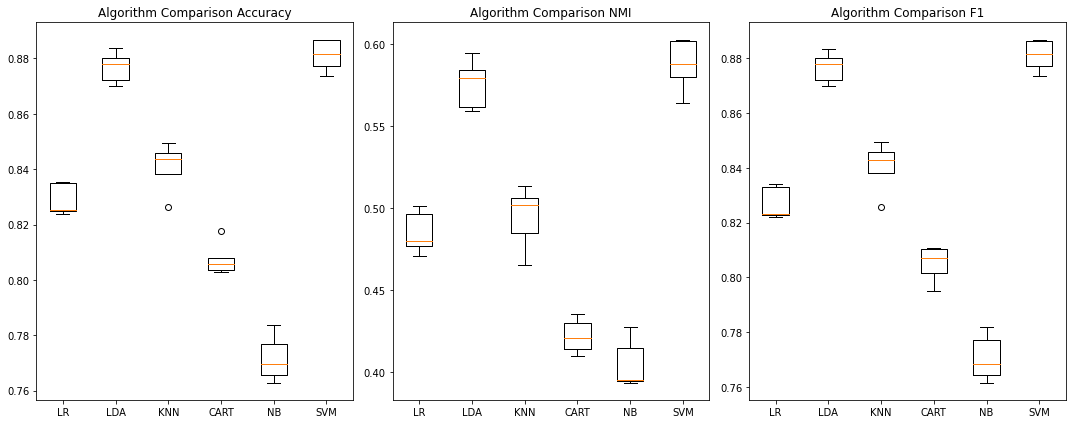

In [ ]:
results_Spot_Check_Algorithms = Spot_Check_Algorithms(X_train , Y_train)

Accuracy :  AB: 0.846891 (0.005096)
nmi :  AB: 0.506992 (0.010914)
f1_score :  AB: 0.846614 (0.005071)
############################################################
Accuracy :  LGBM: 0.892348 (0.003950)
nmi :  LGBM: 0.615024 (0.010419)
f1_score :  LGBM: 0.892179 (0.003919)
############################################################
Accuracy :  RF: 0.862296 (0.005892)
nmi :  RF: 0.542034 (0.015263)
f1_score :  RF: 0.860661 (0.005436)
############################################################
Accuracy :  ET: 0.864072 (0.006773)
nmi :  ET: 0.548968 (0.021815)
f1_score :  ET: 0.863894 (0.007427)
############################################################
Accuracy :  XGB: 0.887086 (0.005339)
nmi :  XGB: 0.601952 (0.013717)
f1_score :  XGB: 0.886943 (0.005281)
############################################################


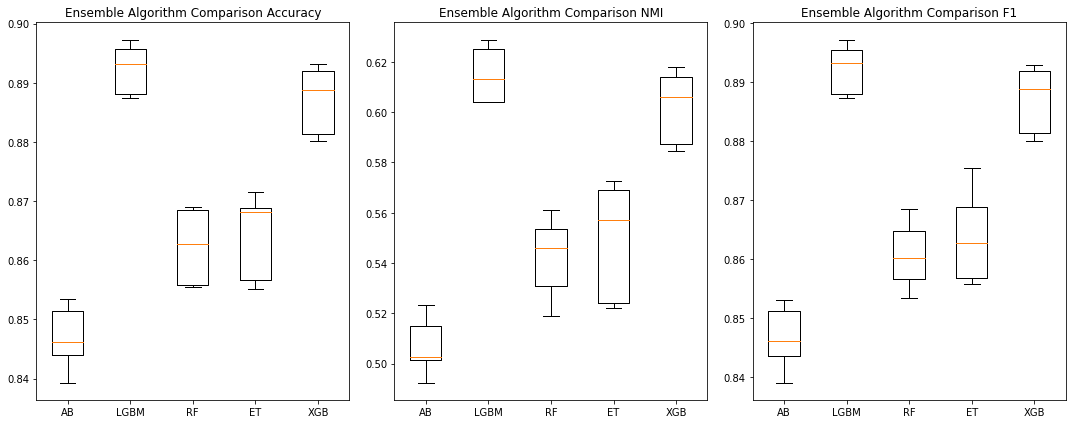

In [ ]:
results_ensembles = ensembles_methods(X_train , Y_train)

In [ ]:
frames = [results_Spot_Check_Algorithms, results_ensembles]

final_results = pd.concat(frames)
final_results

,Accuracy,NMI,F1_score
LR,0.828884,0.485229,0.826975
LDA,0.876878,0.575939,0.876569
KNN,0.840741,0.494337,0.840422
CART,0.807519,0.422050,0.804957
NB,0.771698,0.405307,0.770696
SVM,0.881316,0.587587,0.881127
AB,0.846891,0.506992,0.846614
LGBM,0.892348,0.615024,0.892179
RF,0.862296,0.542034,0.860661
ET,0.864072,0.548968,0.863894


In [ ]:
best_score , best_params = tune_SVM(X_train , Y_train)

Best: 0.882711 using {'C': 2.7215800003487542, 'kernel': 'rbf'}
0.562419 (0.044462) with: {'C': 0.125, 'kernel': 'linear'}
0.859506 (0.007208) with: {'C': 0.125, 'kernel': 'rbf'}
0.661637 (0.012809) with: {'C': 0.2314686780718226, 'kernel': 'linear'}
0.870348 (0.006326) with: {'C': 0.2314686780718226, 'kernel': 'rbf'}
0.767197 (0.005501) with: {'C': 0.4286219914265364, 'kernel': 'linear'}
0.875040 (0.004690) with: {'C': 0.4286219914265364, 'kernel': 'rbf'}
0.809928 (0.005596) with: {'C': 0.7937005259840997, 'kernel': 'linear'}
0.879287 (0.005073) with: {'C': 0.7937005259840997, 'kernel': 'rbf'}
0.831928 (0.004606) with: {'C': 1.4697344922755986, 'kernel': 'linear'}
0.881950 (0.005160) with: {'C': 1.4697344922755986, 'kernel': 'rbf'}
0.846637 (0.003953) with: {'C': 2.7215800003487542, 'kernel': 'linear'}
0.882711 (0.005533) with: {'C': 2.7215800003487542, 'kernel': 'rbf'}
0.856210 (0.005784) with: {'C': 5.039684199579492, 'kernel': 'linear'}
0.880111 (0.004772) with: {'C': 5.03968419957

In [ ]:
best_score

0.8827108383488078

##############################################################
Accuracy = 	 0.8876774847870182
##############################################################
              precision    recall  f1-score   support

           1       0.83      0.88      0.85       819
           2       0.90      0.91      0.90      1514
           3       0.91      0.87      0.89      1611

    accuracy                           0.89      3944
   macro avg       0.88      0.89      0.88      3944
weighted avg       0.89      0.89      0.89      3944

##############################################################


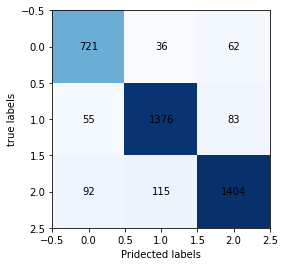

In [ ]:
Finalize_SVM_Model(X_train , Y_train , X_test , Y_test , best_params['kernel'] , best_params['C'])

#### Methode 2

In [ ]:
X = pubmed['fea']
y = pubmed['gnd']
W = pubmed['W']

##### x_markov

In [ ]:
def create_degree_matrix(X):
    M = np.sum(X, axis=1)
    M = np.squeeze(np.asarray(M))
    return np.diag(M)

In [ ]:
#See "Incorporating network structure with node contents for community detection on large networks using deep learning" (Cao et al., 2018)
def markov_matrix(W, X):
    D = create_degree_matrix(W)
    D = csc_matrix(D)
    D_inv = inv(D) # Calculating the inverse of the matrix
    R = D_inv @ X
    return R.astype('float32')

In [ ]:
X_markov = markov_matrix(W , X ).astype('float32')

In [ ]:
X_markov

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03487878, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.01942665, 0.0079607 , ..., 0.        , 0.        ,
        0.        ],
       [0.10782092, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02658384, 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [ ]:
# Prepare Data

# Split-out validation dataset

validation_size = 0.20
seed_split = 7
X_train, X_test, Y_train, Y_test = train_test_split(X_markov, y, test_size=validation_size, random_state=seed_split)


Accuracy :  LR: 0.817853 (0.007381)
nmi :  LR: 0.454606 (0.014348)
f1_score :  LR: 0.815187 (0.007340)
############################################################
Accuracy :  LDA: 0.826792 (0.008797)
nmi :  LDA: 0.469724 (0.019575)
f1_score :  LDA: 0.824570 (0.008750)
############################################################
Accuracy :  KNN: 0.749508 (0.006337)
nmi :  KNN: 0.330903 (0.008874)
f1_score :  KNN: 0.748717 (0.006228)
############################################################
Accuracy :  CART: 0.814493 (0.003643)
nmi :  CART: 0.449324 (0.014012)
f1_score :  CART: 0.815997 (0.004843)
############################################################
Accuracy :  NB: 0.641665 (0.009748)
nmi :  NB: 0.258903 (0.013189)
f1_score :  NB: 0.636804 (0.009056)
############################################################
Accuracy :  SVM: 0.835795 (0.006999)
nmi :  SVM: 0.486753 (0.014844)
f1_score :  SVM: 0.835114 (0.006953)
############################################################


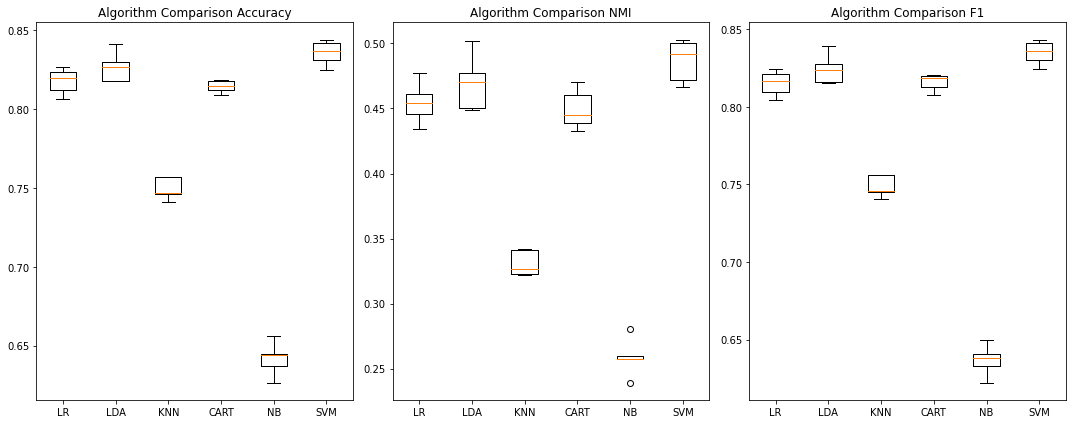

In [ ]:
results_Spot_Check_Algorithms = Spot_Check_Algorithms(X_train , Y_train)

Accuracy :  AB: 0.822037 (0.003917)
nmi :  AB: 0.472218 (0.007639)
f1_score :  AB: 0.821603 (0.003900)
############################################################
Accuracy :  LGBM: 0.900653 (0.004842)
nmi :  LGBM: 0.639518 (0.012211)
f1_score :  LGBM: 0.900589 (0.004856)
############################################################
Accuracy :  RF: 0.882267 (0.005268)
nmi :  RF: 0.596937 (0.015581)
f1_score :  RF: 0.880830 (0.006032)
############################################################
Accuracy :  ET: 0.874151 (0.004637)
nmi :  ET: 0.578974 (0.012162)
f1_score :  ET: 0.872126 (0.005799)
############################################################
Accuracy :  XGB: 0.892855 (0.004833)
nmi :  XGB: 0.619358 (0.012347)
f1_score :  XGB: 0.892781 (0.004845)
############################################################


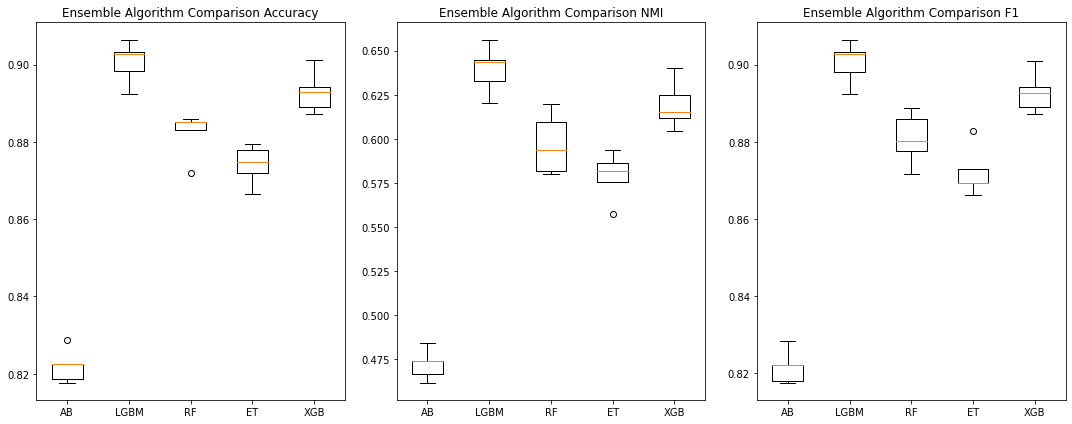

In [ ]:
results_ensembles = ensembles_methods(X_train , Y_train)

In [ ]:
frames = [results_Spot_Check_Algorithms, results_ensembles]

final_results = pd.concat(frames)
final_results

,Accuracy,NMI,F1_score
LR,0.817853,0.454606,0.815187
LDA,0.826792,0.469724,0.824570
KNN,0.749508,0.330903,0.748717
CART,0.814493,0.449324,0.815997
NB,0.641665,0.258903,0.636804
SVM,0.835795,0.486753,0.835114
AB,0.822037,0.472218,0.821603
LGBM,0.900653,0.639518,0.900589
RF,0.882267,0.596937,0.880830
ET,0.874151,0.578974,0.872126


##############################################################
Accuracy = 	 0.8496450304259635
##############################################################
              precision    recall  f1-score   support

           1       0.87      0.79      0.83       819
           2       0.82      0.90      0.86      1514
           3       0.87      0.83      0.85      1611

    accuracy                           0.85      3944
   macro avg       0.85      0.84      0.85      3944
weighted avg       0.85      0.85      0.85      3944

##############################################################


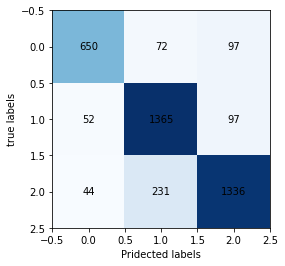

In [ ]:
Finalize_SVM_Model(X_train , Y_train , X_test , Y_test , 'rbf' , 1.0)

##############################################################
Accuracy = 	 0.9117647058823529
##############################################################
              precision    recall  f1-score   support

           1       0.90      0.91      0.91       819
           2       0.92      0.93      0.92      1514
           3       0.91      0.90      0.91      1611

    accuracy                           0.91      3944
   macro avg       0.91      0.91      0.91      3944
weighted avg       0.91      0.91      0.91      3944

##############################################################


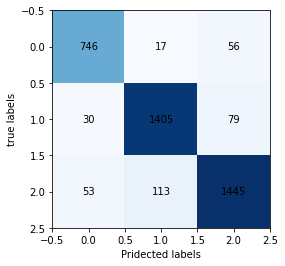

In [ ]:
Finalize_LGBM_Model(X_train , Y_train , X_test , Y_test )